# Module 06 -- Building More Intricate Data Visualizations

In the last module we started building some visualizations in order to answer specific substantive questions. In this module we will look at generating more advanced graphics that have annotations, combine several graphics into one, build some interactive graphics, and also do some mapping.

# Combining Plots with `{patchwork}`
Often you have to combine and place multiple graphics into a single canvas. There are a few ways to do this but the easiest way is that offered by the `{patchwork}` package. Let us use the `diamonds` data for this section, a data frame with 53940 rows and 10 variables:

| Variable | Description |
| :-- | :-- |
| price |  price in US dollars (\$326--\$18,823) |
| carat | weight of the diamond (0.2--5.01) |
| cut | quality of the cut (Fair, Good, Very Good, Premium, Ideal) |
| color | diamond colour, from D (best) to J (worst) |
| clarity | a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) |
| x | length in mm (0--10.74) |
| y | width in mm (0--58.9) |
| z | depth in mm (0--31.8) |
| depth | total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) |
| table | width of top of diamond relative to widest point (43--95) |

## The Basics
To combine multiple plots, we need to save `each plot` with a unique name. I am calling them `p1`, `p2`, etc.

In [5]:
install.packages("patchwork")
install.packages("tidylog")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘clisymbols’




In [29]:
options(repr.plot.width = 14, repr.plot.height = 14)

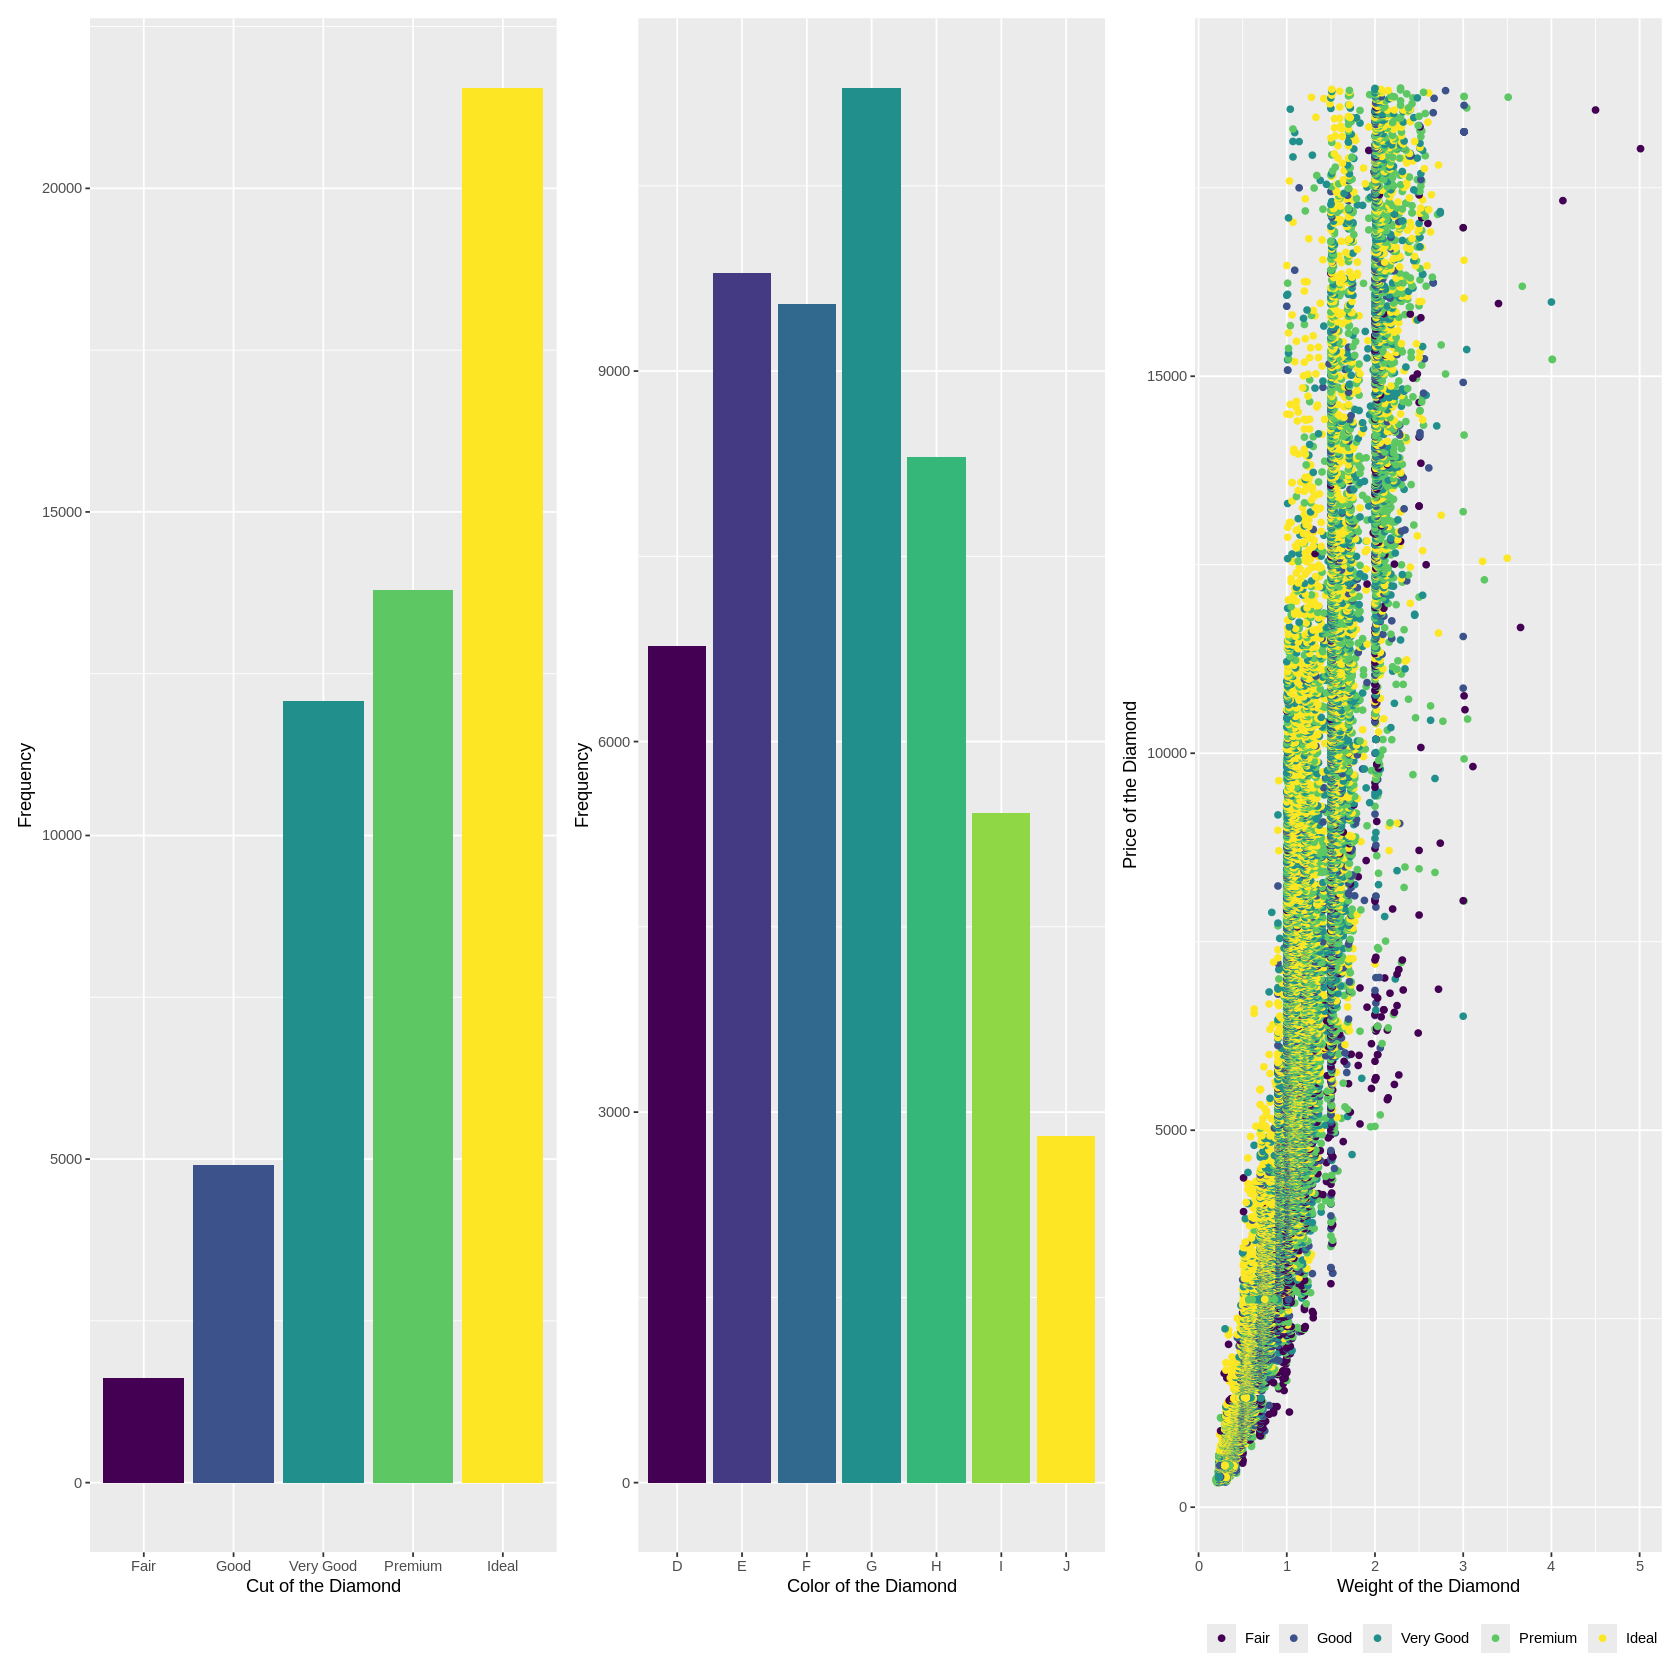

In [30]:
library(patchwork)
library(tidyverse)
library(tidylog)

ggplot() +
  geom_bar(data = diamonds,
           aes(x = cut, fill = cut)
           ) +
  labs(x = "Cut of the Diamond", y = "Frequency") +
  theme(legend.position = "none") -> p1

ggplot() +
  geom_bar(data = diamonds,
           aes(x = color, fill = color)
           ) +
  labs(x = "Color of the Diamond", y = "Frequency") +
  theme(legend.position = "none") -> p2

ggplot() +
  geom_point(data = diamonds,
           aes(x = carat, y = price, color = cut)
           ) +
  labs(x = "Weight of the Diamond", y = "Price of the Diamond", color = "") +
  theme(legend.position = "bottom") -> p3

ggplot() +
  geom_boxplot(data = diamonds,
           aes(x = price, y = clarity, fill = cut)
           ) +
  labs(y = "Clarity of the Diamond", x = "Price of the Diamond", fill = "") +
  theme(legend.position = "bottom") -> p4

p1 + p2 + p3

Notice the default layout here: `p1 + p2 + p3` gives us the plots all in a row. But you may have other plans, for example, to put the scatterplot in a row all its own.

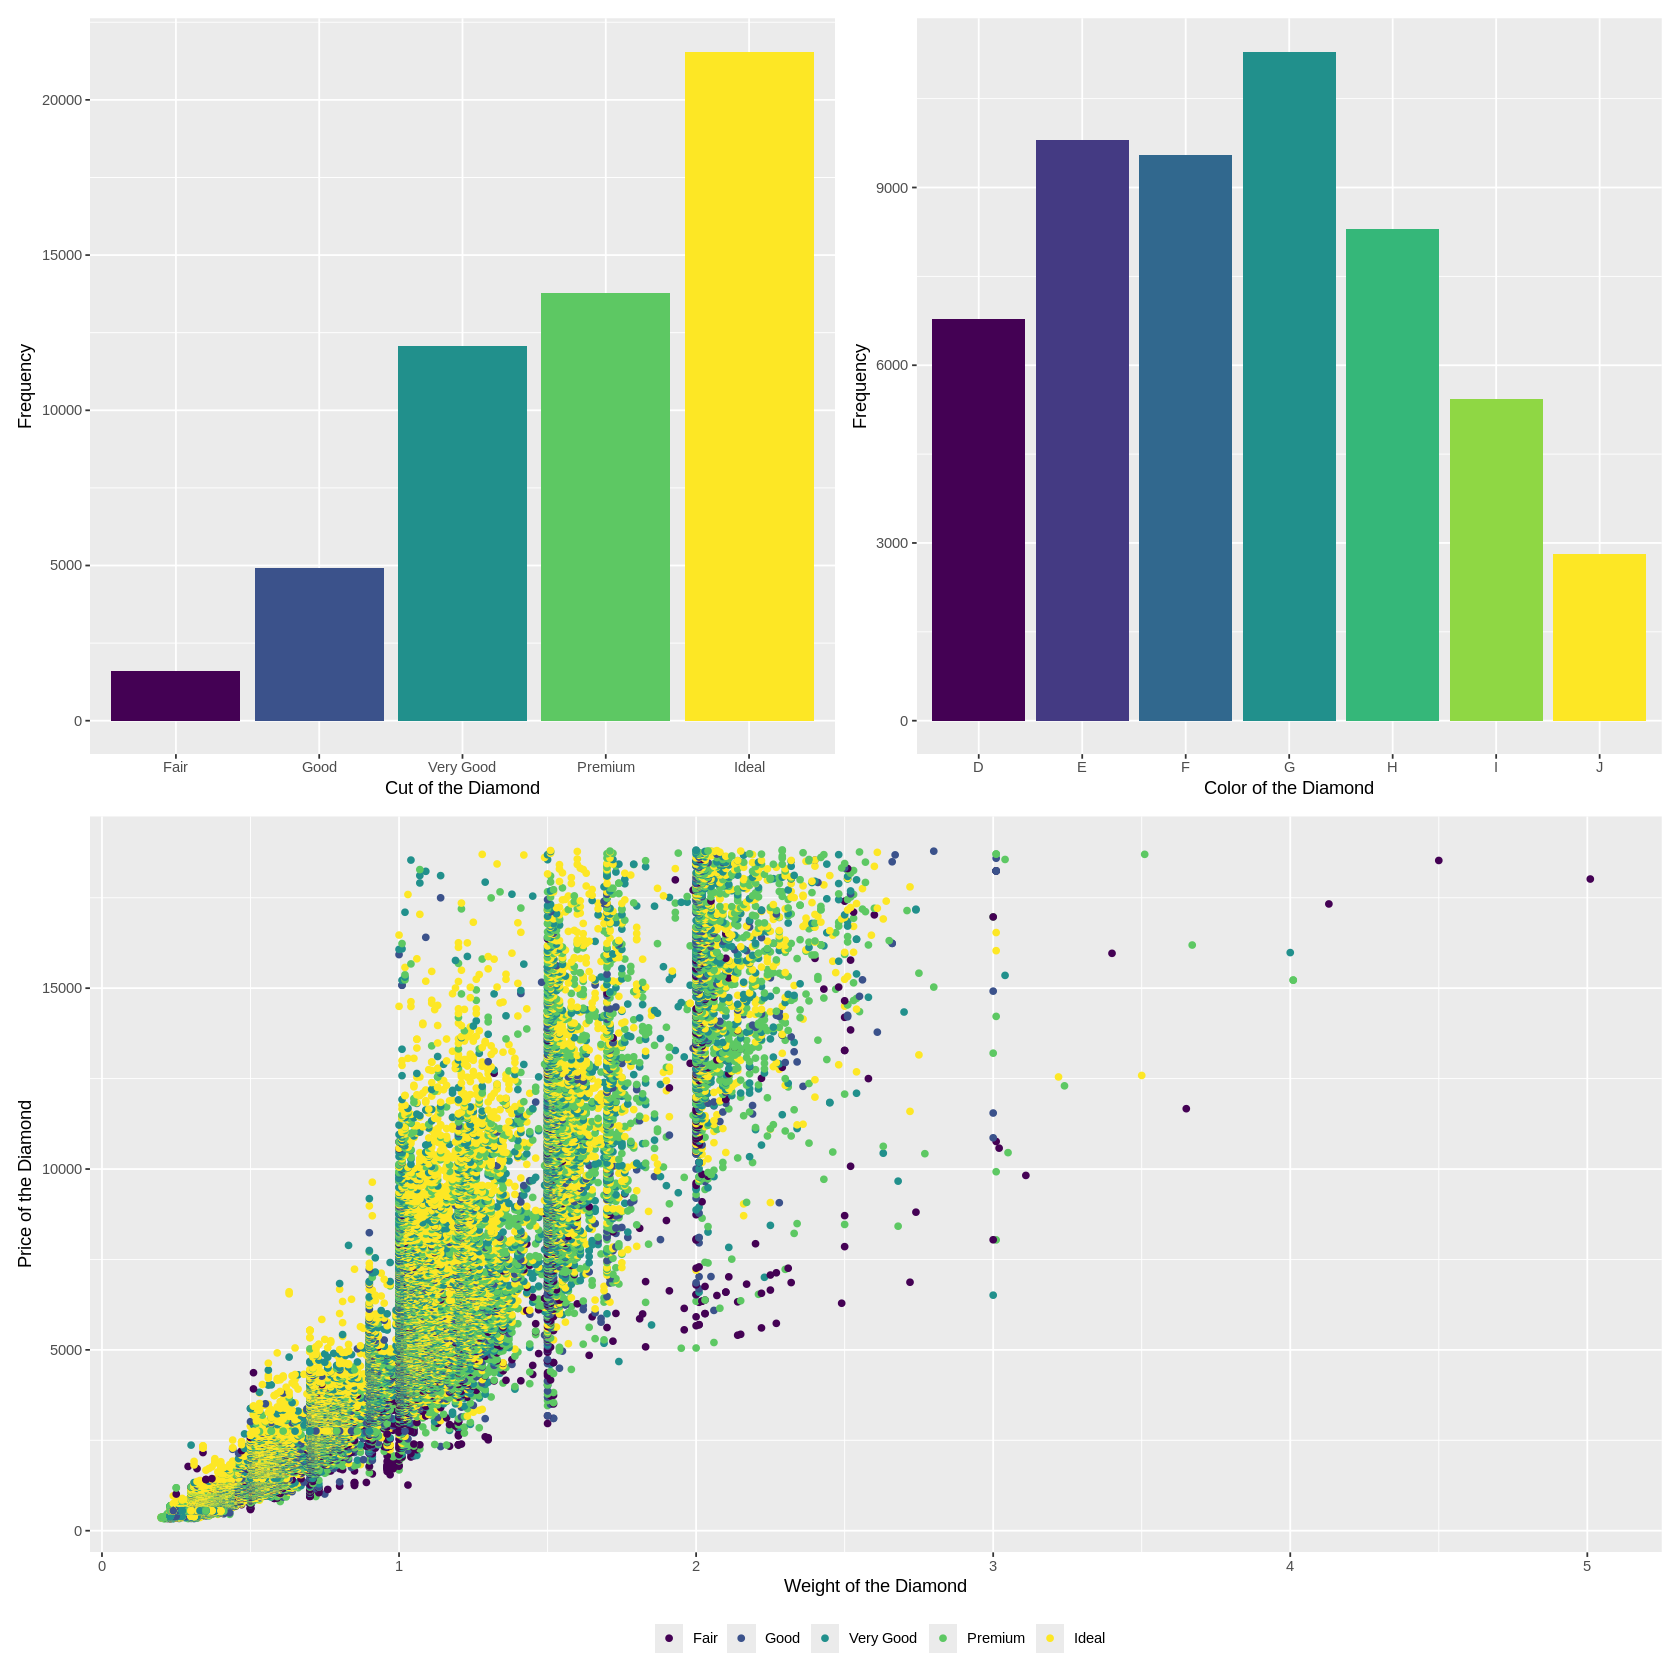

In [31]:
(p1 + p2) / p3

Now we have `p3` in the second row, all by itself. Note that this was achieved via the `/` operator. What if we used `|` instead?

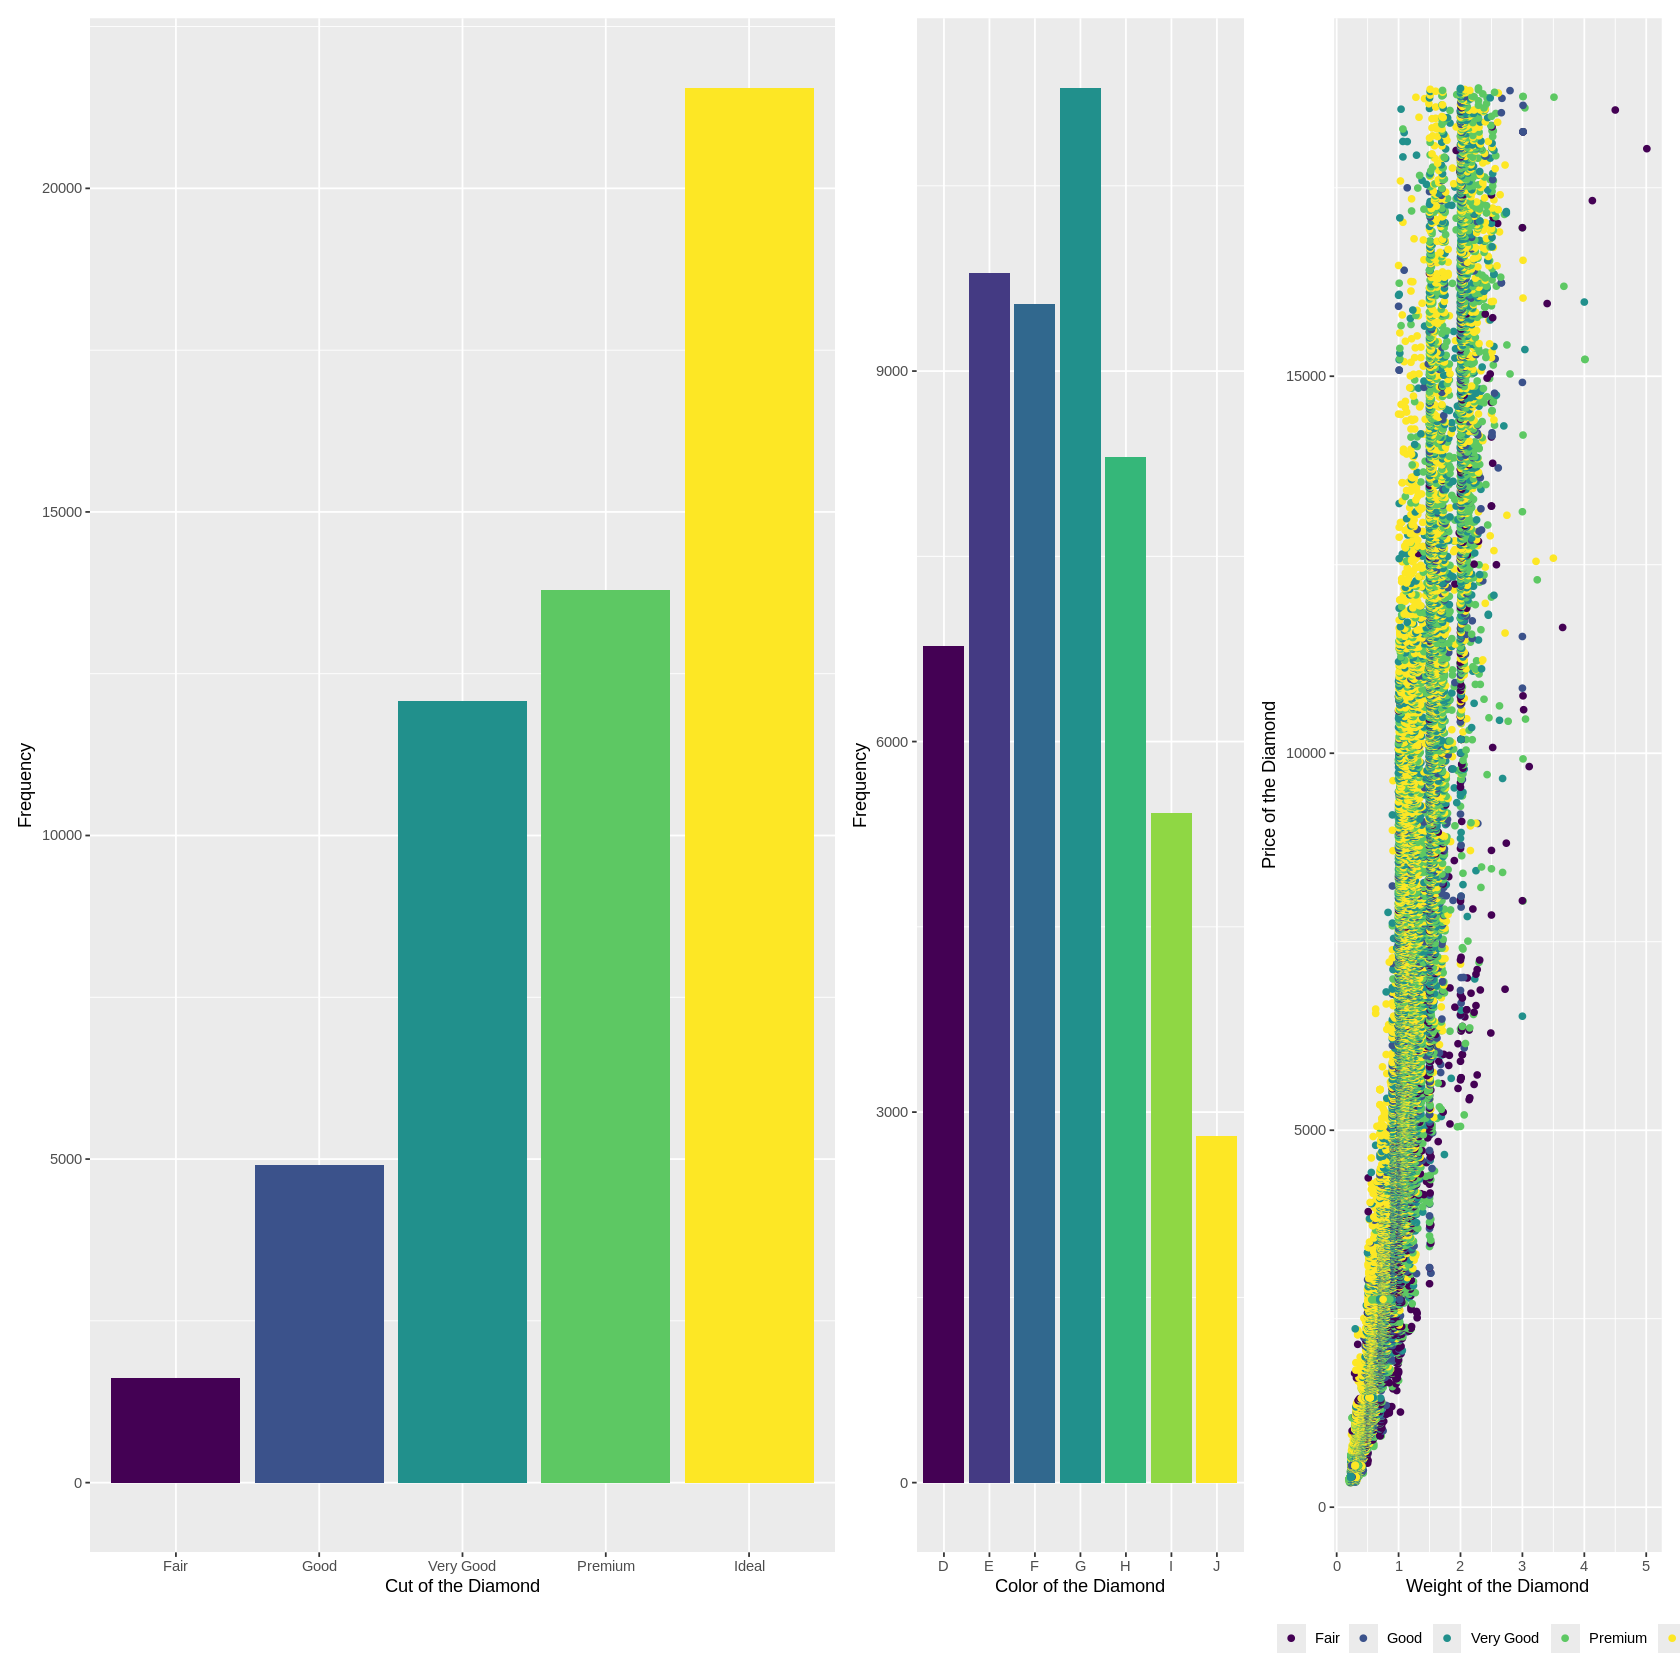

In [32]:
p1 | (p2 + p3)

You ended up with two columns, the first containing only `p1` and the second containing `p2` and `p3`. So make a note of the difference between `|` and `/`. For example, note the following setup:

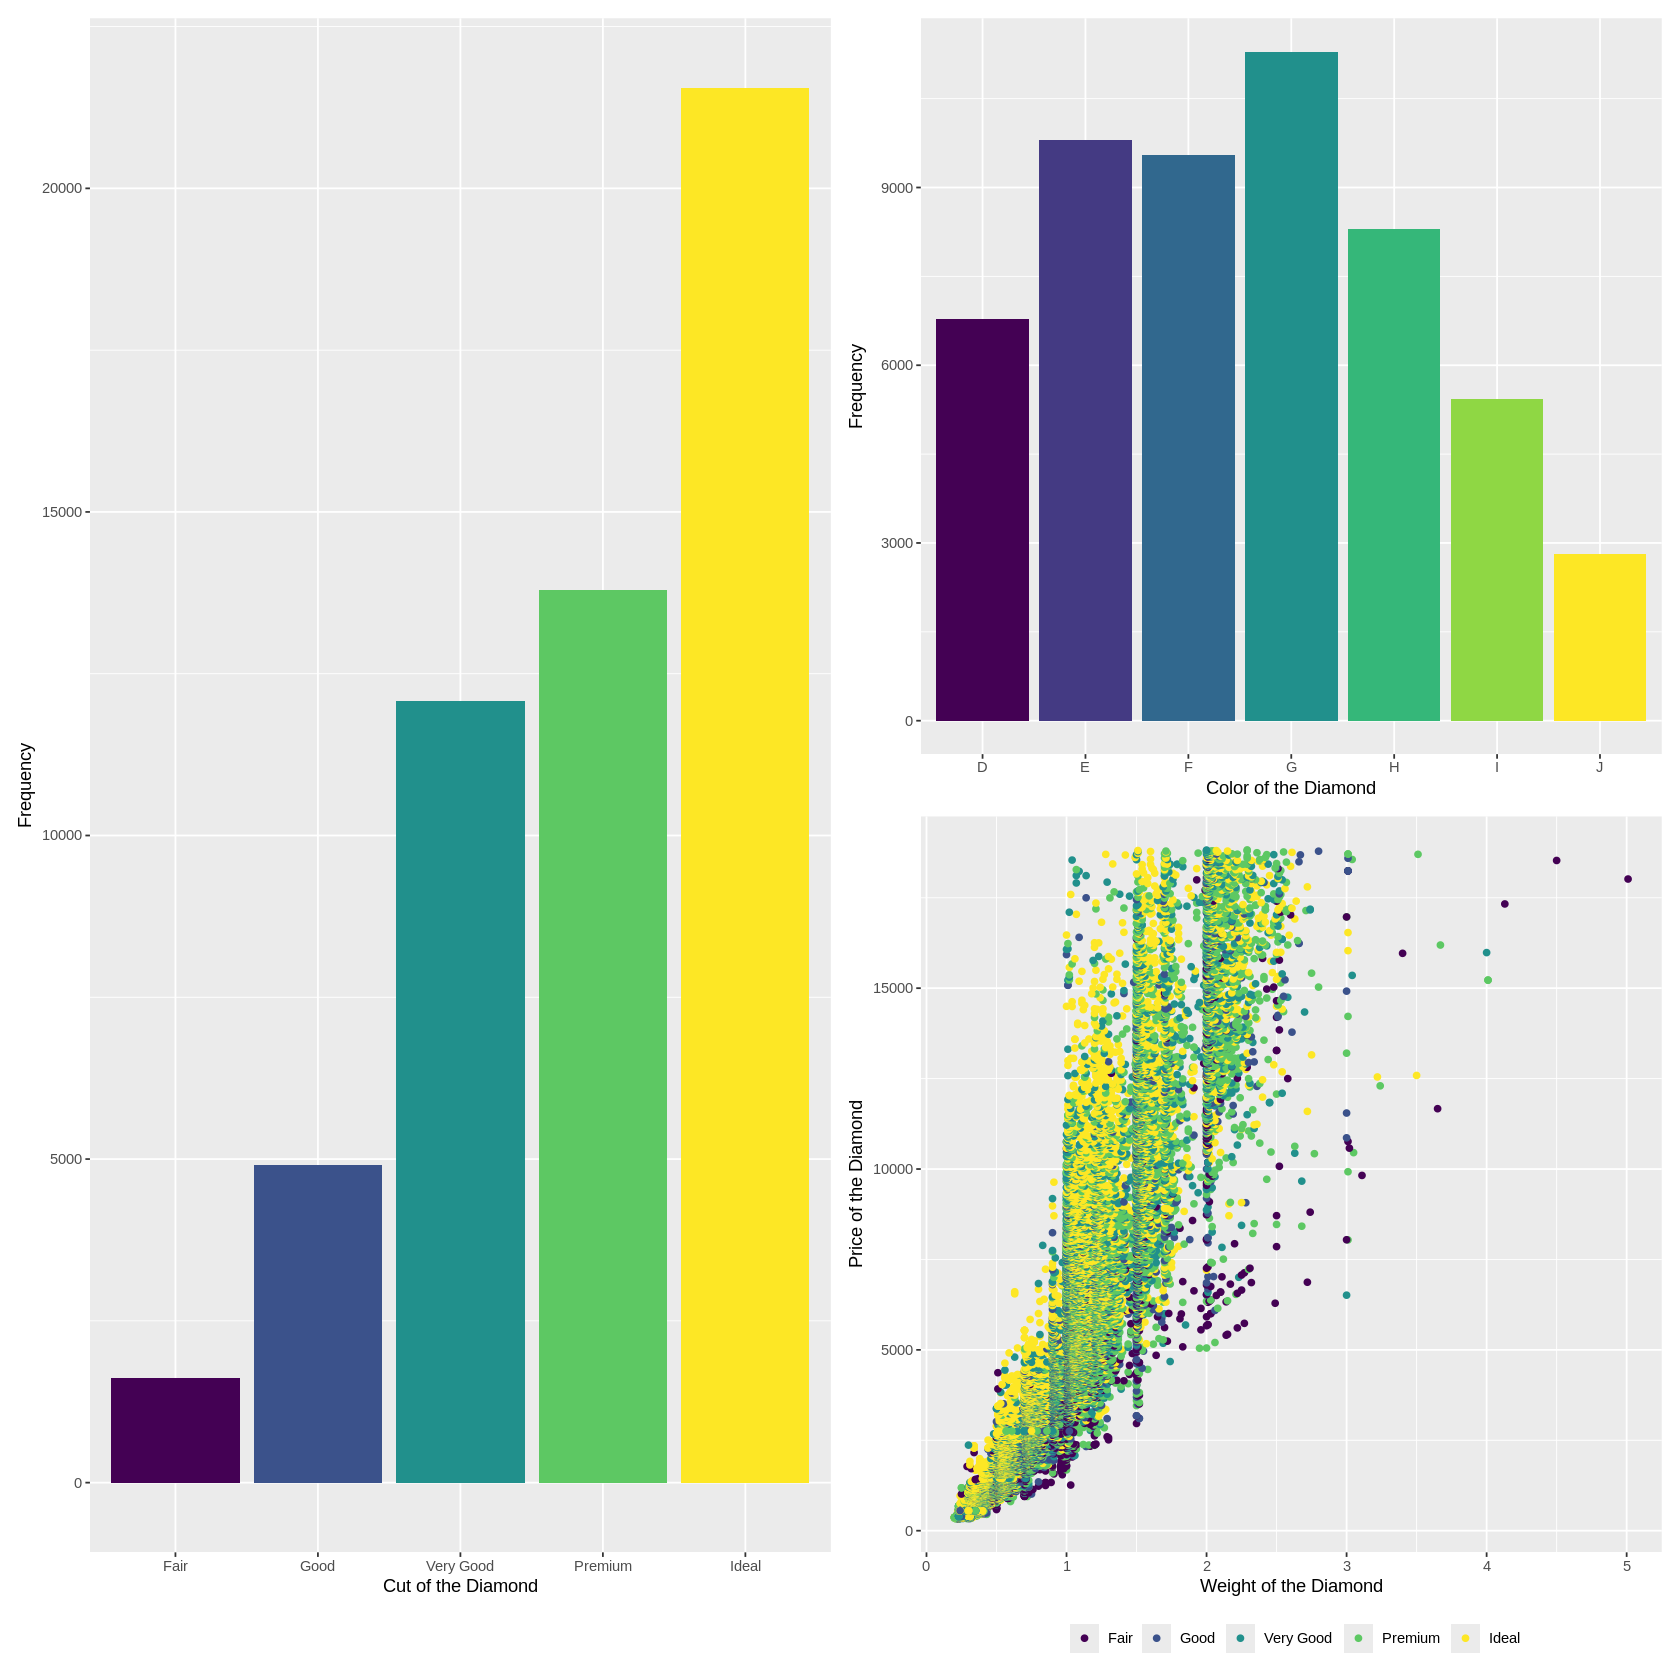

In [33]:
p1 | (p2 / p3)

What if we wanted to squeeze in the fourth plot?

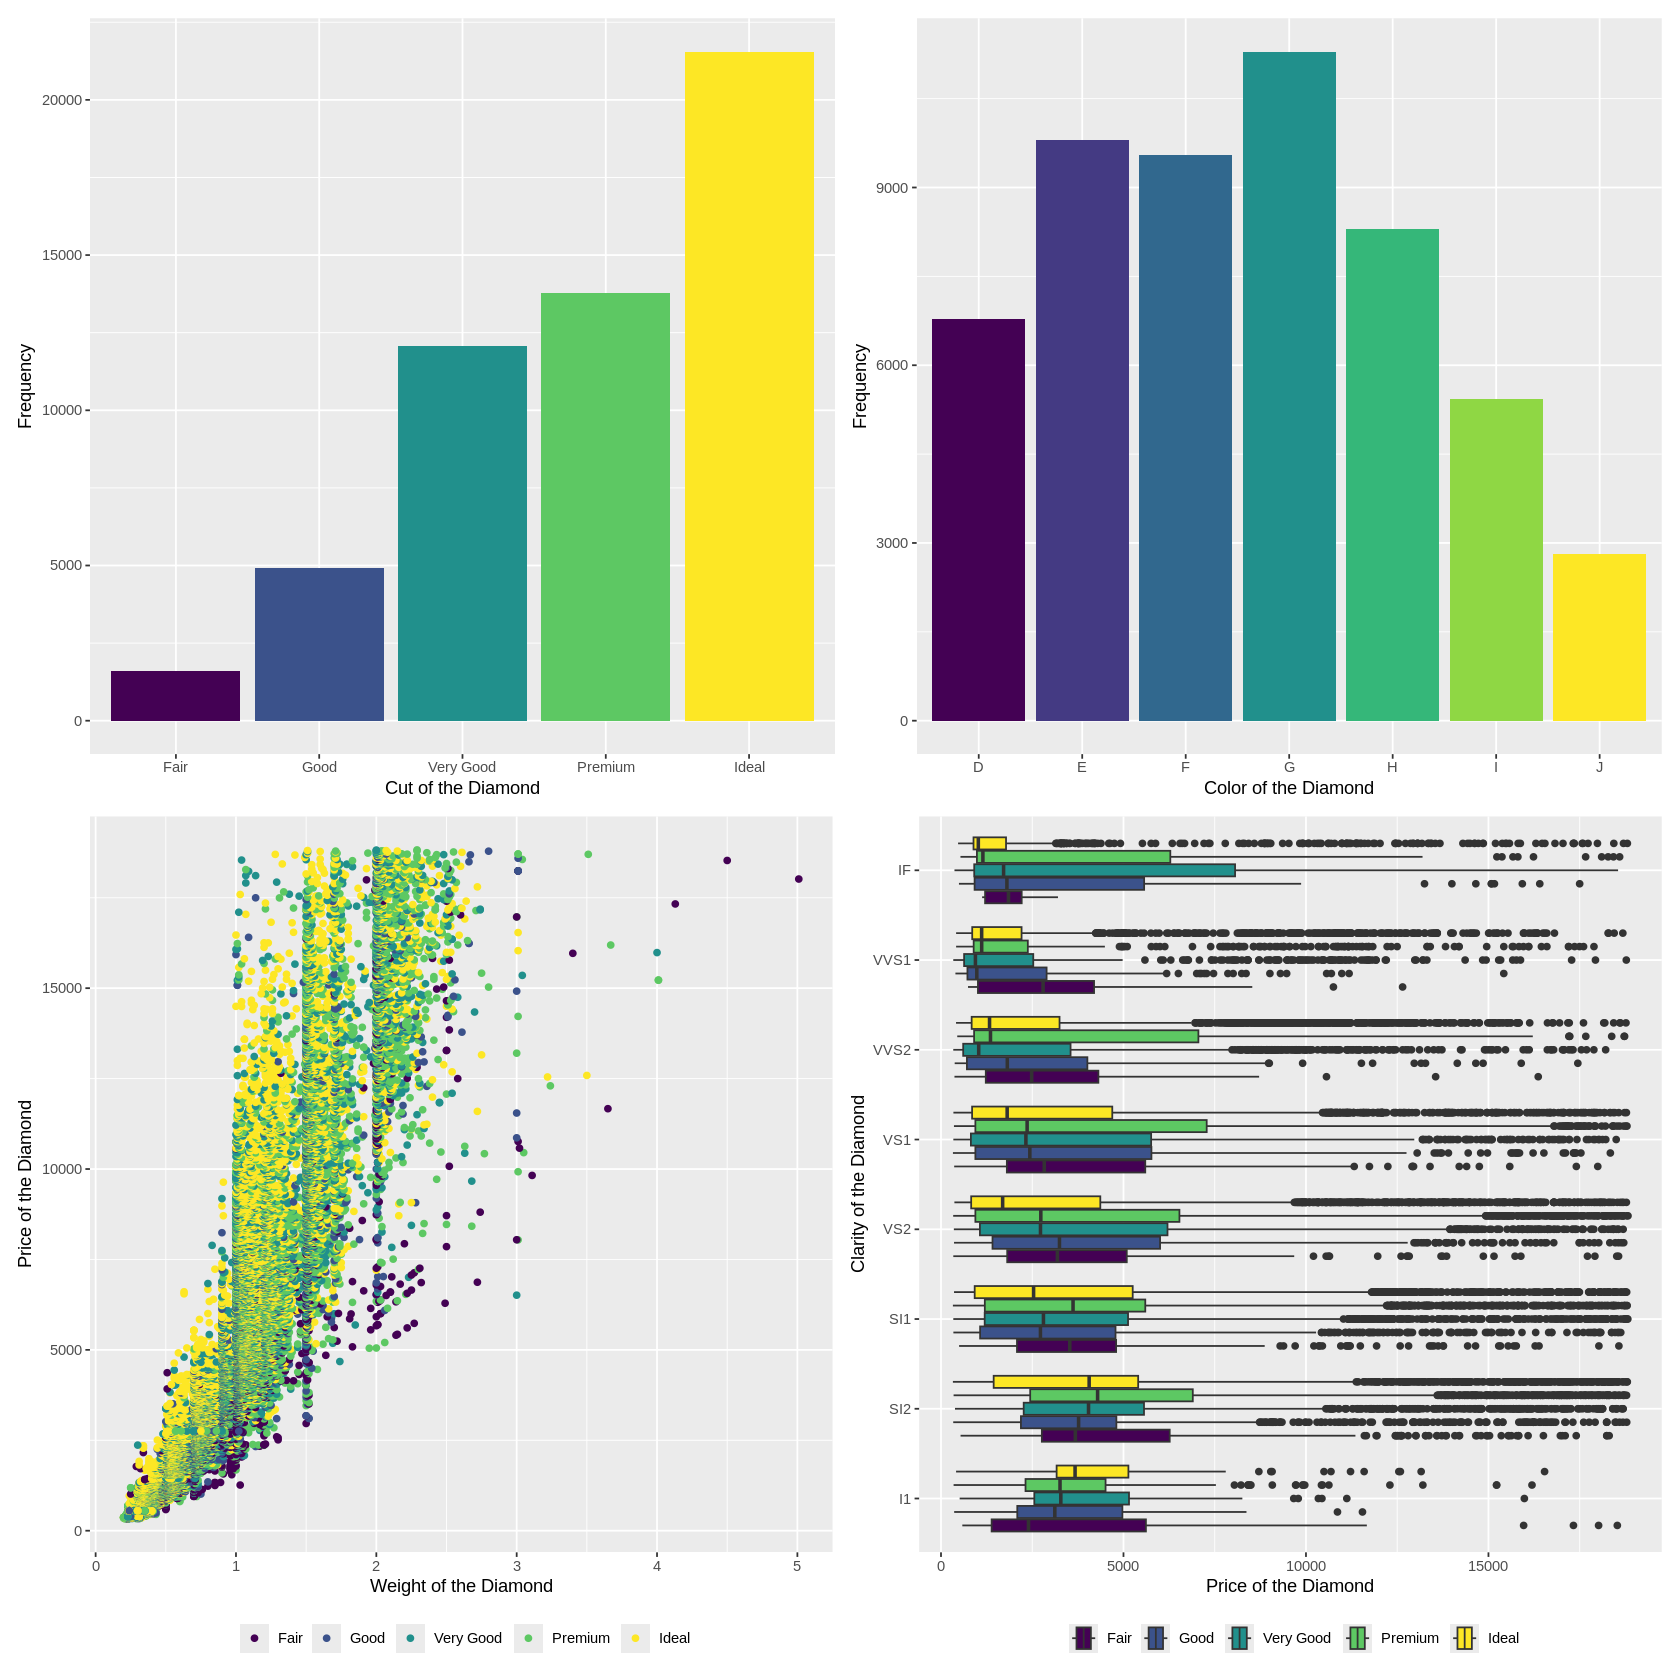

In [34]:
(p1 + p2) / (p3 + p4)

## Annotations
Annotations become helpful because you can add omnibus titles and tags for individual plots. For example,

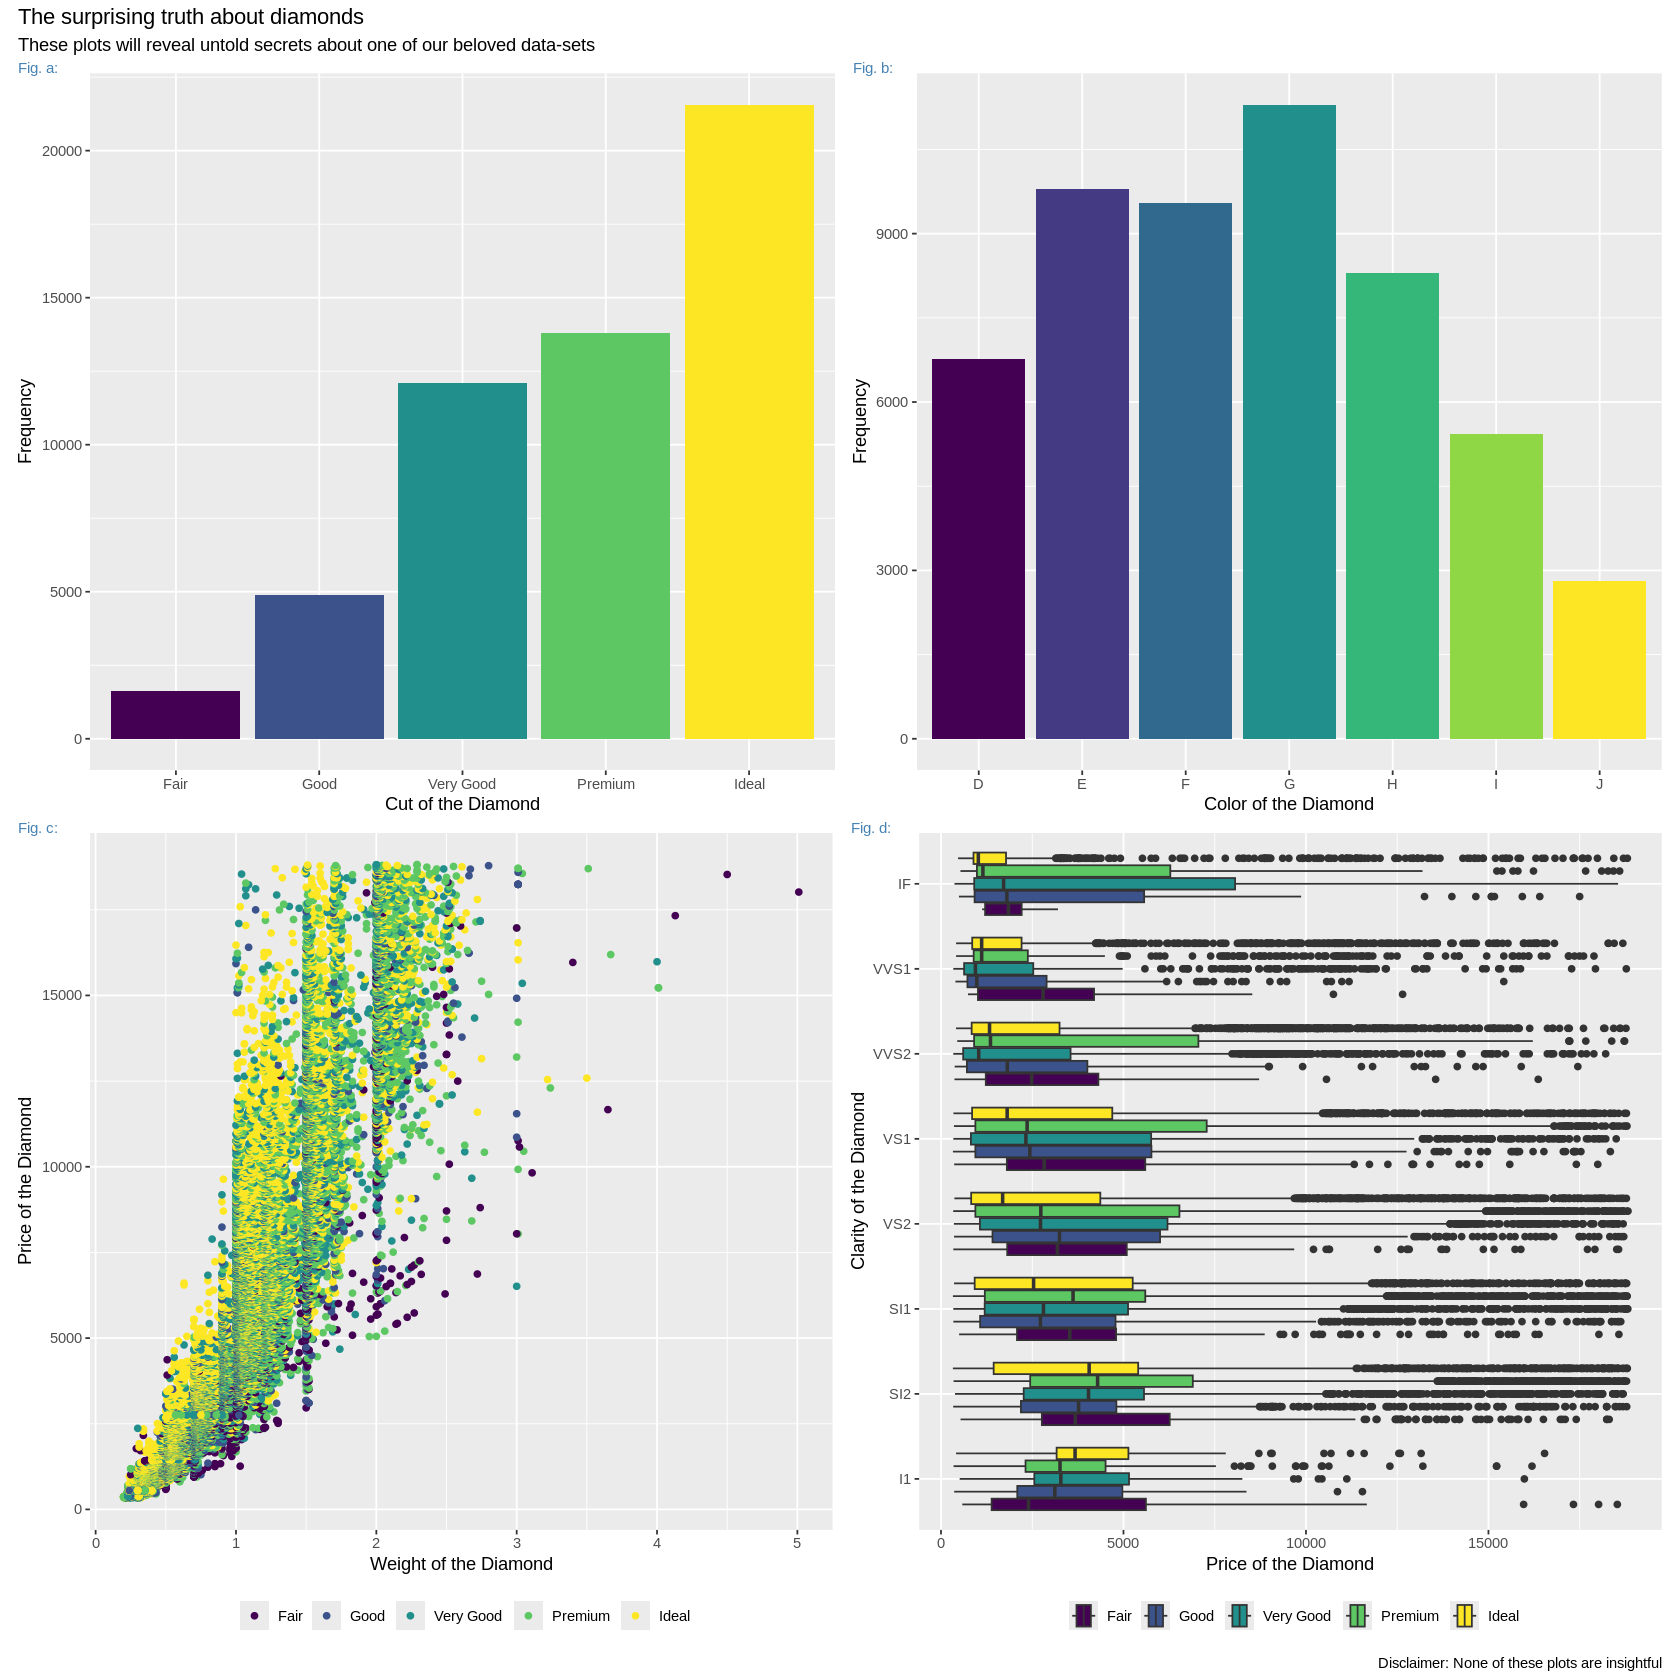

In [35]:
(p1 + p2) / (p3 + p4) +
  plot_annotation(
  title = 'The surprising truth about diamonds',
  subtitle = 'These plots will reveal untold secrets about one of our beloved data-sets',
  caption = 'Disclaimer: None of these plots are insightful',
  tag_levels = c('a', '1'),
  tag_prefix = 'Fig. ',
  tag_sep = '.',
  tag_suffix = ':'
  ) &
  theme(
    plot.tag.position = c(0, 1),
    plot.tag = element_text(size = 9, hjust = 0, vjust = 0, color = "steelblue")
    )

## Spacing and Sizing
We can also tweak the sizes of individual rows and columns, control the space between plots, and so on. First up, spacing the plots with `plot_spacer()`

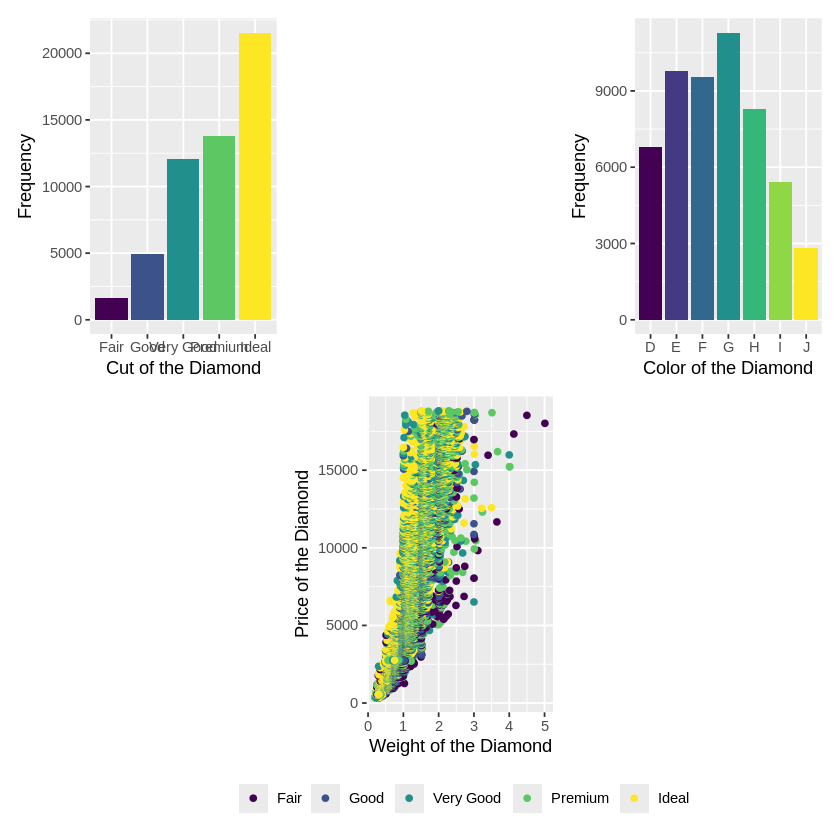

In [ ]:
(p1 + plot_spacer() + p2 + plot_spacer() + p3)

Sizing the plots with relative sizes?

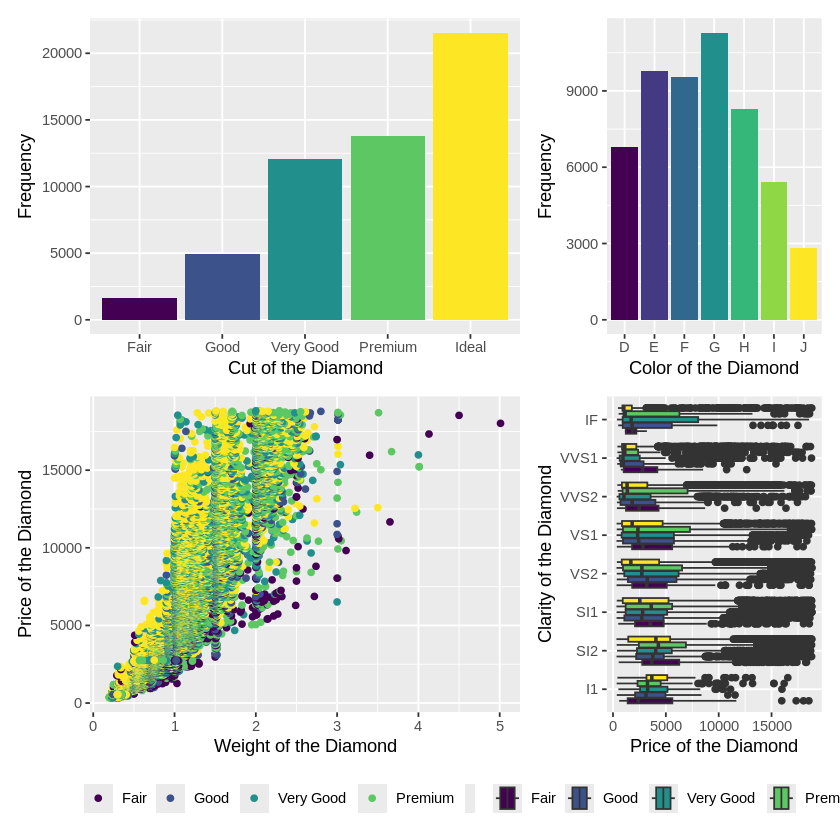

In [ ]:
p1 + p2 + p3 + p4 +
  plot_layout(widths = c(2, 1))

Alternatively, we could specify size with unit vectors, as shown below.

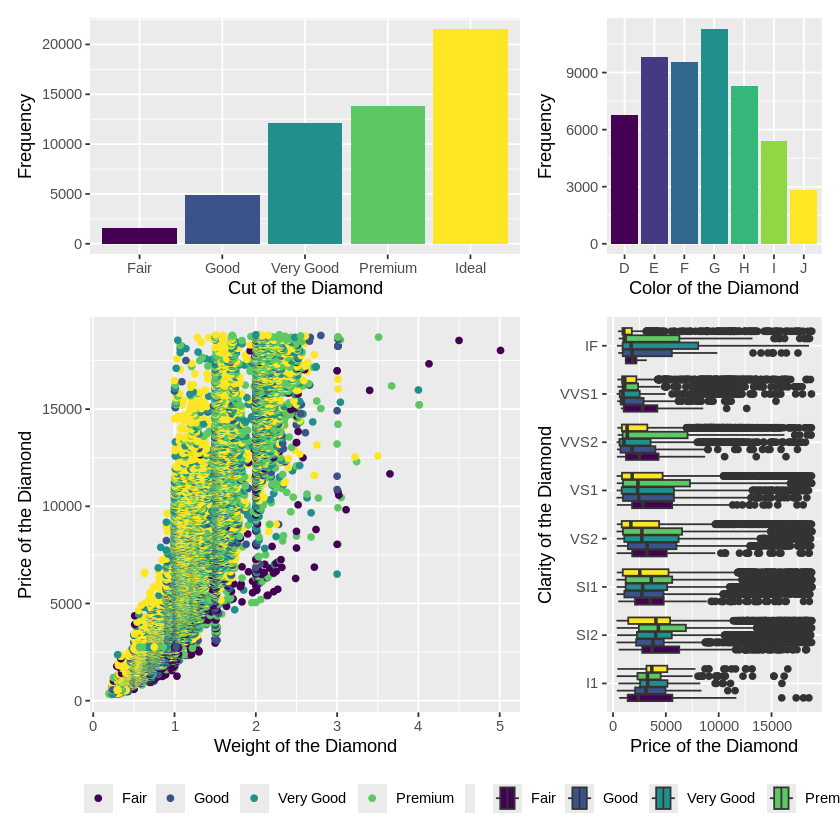

In [ ]:
p1 + p2 + p3 + p4 +
  plot_layout(
    widths = c(2, 1),
    heights = unit(c(5, 1), c('cm', 'null'))
    )

## Moving Beyond the grid

We can use a `layout` design to get a little more flexibility but still retain full control over the result. Layout designs can be done in two ways so let us see the easiest route -- as a text setup. "When using the textual representation it is your responsibility to make sure that each area is rectangular. The only exception is # which denotes empty areas and can thus be of any shape."

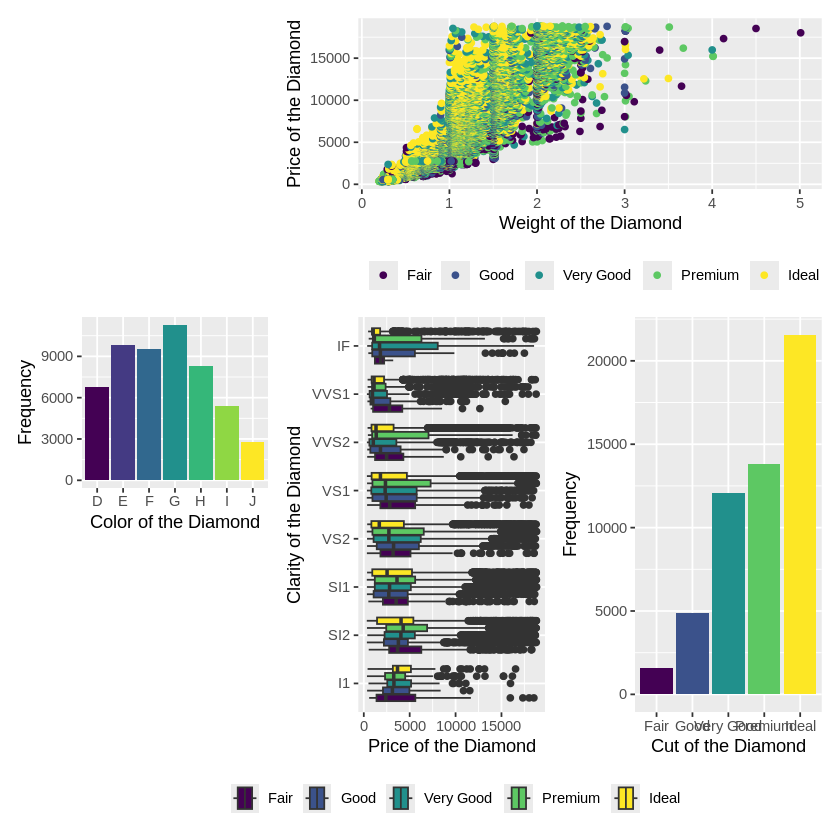

In [ ]:
layout <- "
##BBBB
AACCDD
##CCDD
"
p2 + p3 + p4 + p1 +
  plot_layout(design = layout)

The other path is using `area()` inside `layout`, as shown below.

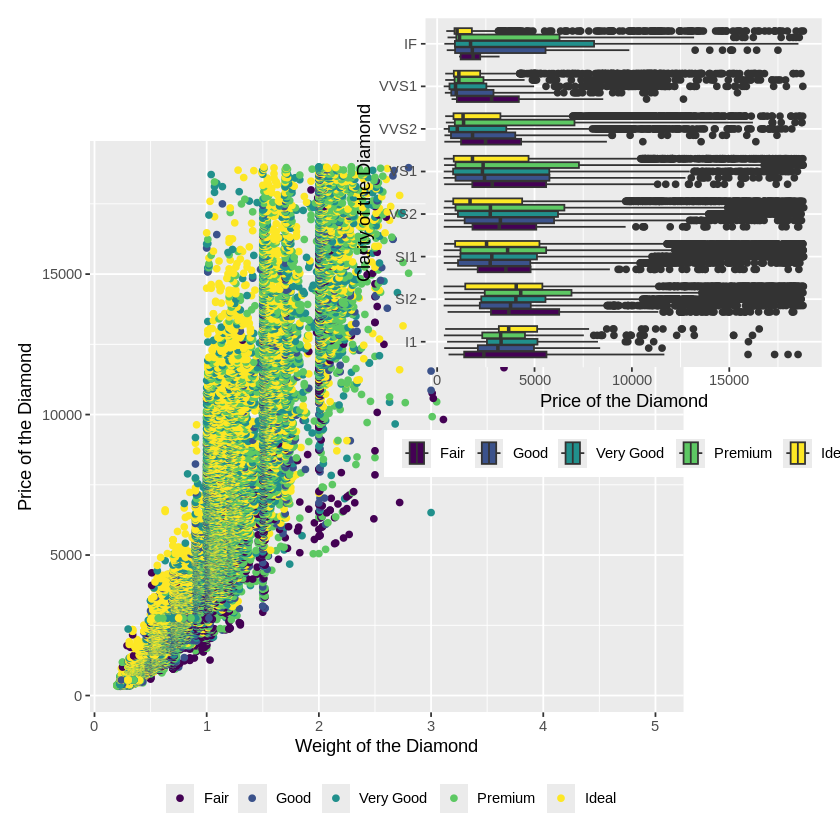

In [ ]:
layout <- c(
  area(t = 2, l = 1, b = 5, r = 4),
  area(t = 1, l = 3, b = 3, r = 5)
  )

p3 + p4 +
  plot_layout(design = layout)

Watch the specification here with `wrap_plots()`

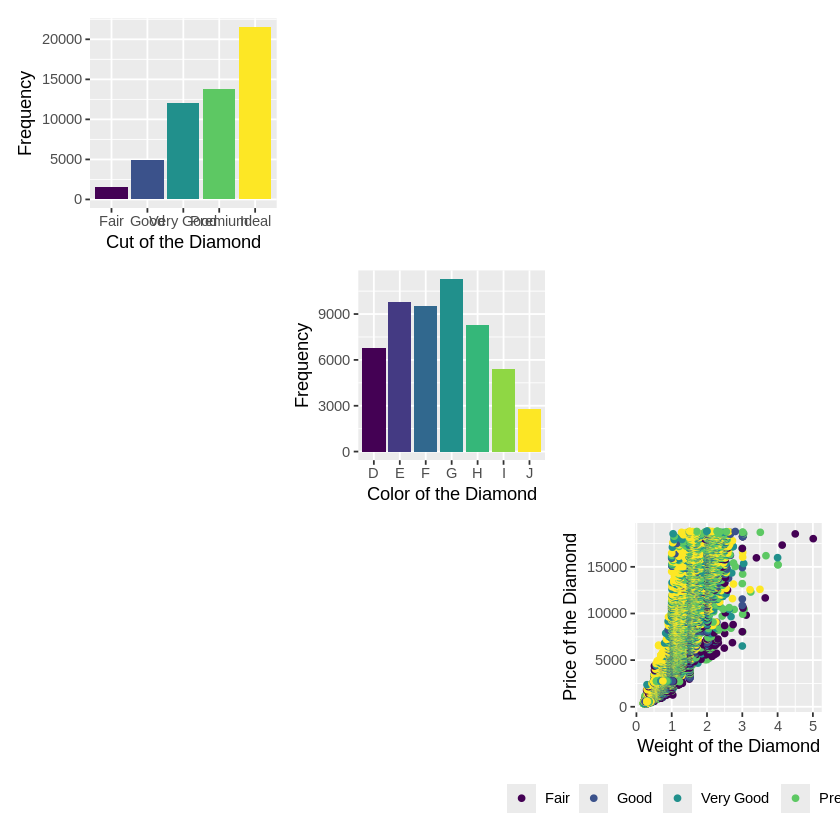

In [ ]:
layout <- '
A##
#B#
##C
'
wrap_plots(A = p1, B = p2, C = p3, design = layout)

## Fixed-aspect plots

There are some plots that use fixed coordinates and these should not be disturbed. Here is an example

In [8]:
install.packages("remotes")
install.packages("wk")
install.packages("proxy")
install.packages("e1071")
install.packages("units")
install.packages("classInt")
install.packages("maps")
install.packages("mapproj")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
system('sudo apt install libudunits2-dev')

In [9]:
#remotes::install_version("s2", "1.0.6")
remotes::install_github("r-spatial/s2")


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpyZF1zw/remotes19770053e61/r-spatial-s2-87d2f34/DESCRIPTION’ ... OK
* preparing ‘s2’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* running ‘cleanup’
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘s2/vignettes’
* building ‘s2_1.1.7.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("sf")

In [14]:
install.packages("ggthemes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
devtools::install_github("UrbanInstitute/urbnmapr")


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpyZF1zw/remotes1971d50f9b/UrbanInstitute-urbnmapr-ef9f448/DESCRIPTION’ ... OK
* preparing ‘urbnmapr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
  NB: this package now depends on R (>= 3.5.0)
  serialize/load version 3 cannot be read in older versions of R.
  File(s) containing such objects:
    ‘urbnmapr/R/sysdata.rda’
* building ‘urbnmapr_0.0.0.9002.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



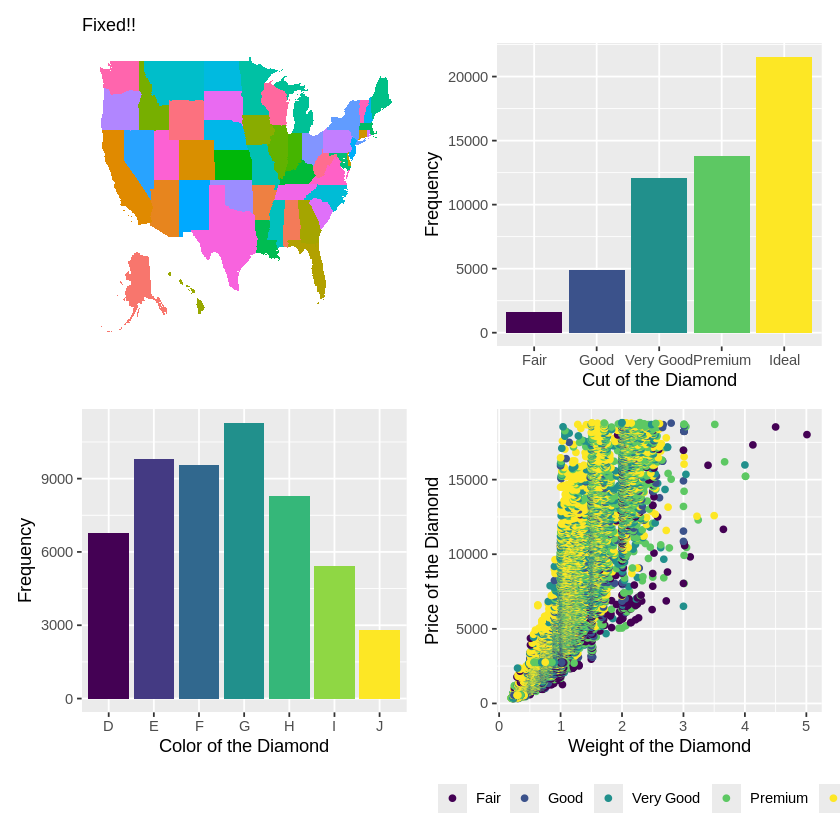

In [16]:
library(urbnmapr)

ggplot() +
  geom_polygon(
    data = states,
    aes(
      x = long,
      y = lat,
      group = group,
      fill = state_abbv
      )
    ) +
  ggthemes::theme_map() +
  theme(legend.position = "none") +
  labs(title = "Fixed!!") -> mymap

mymap + p1 + p2 + p3

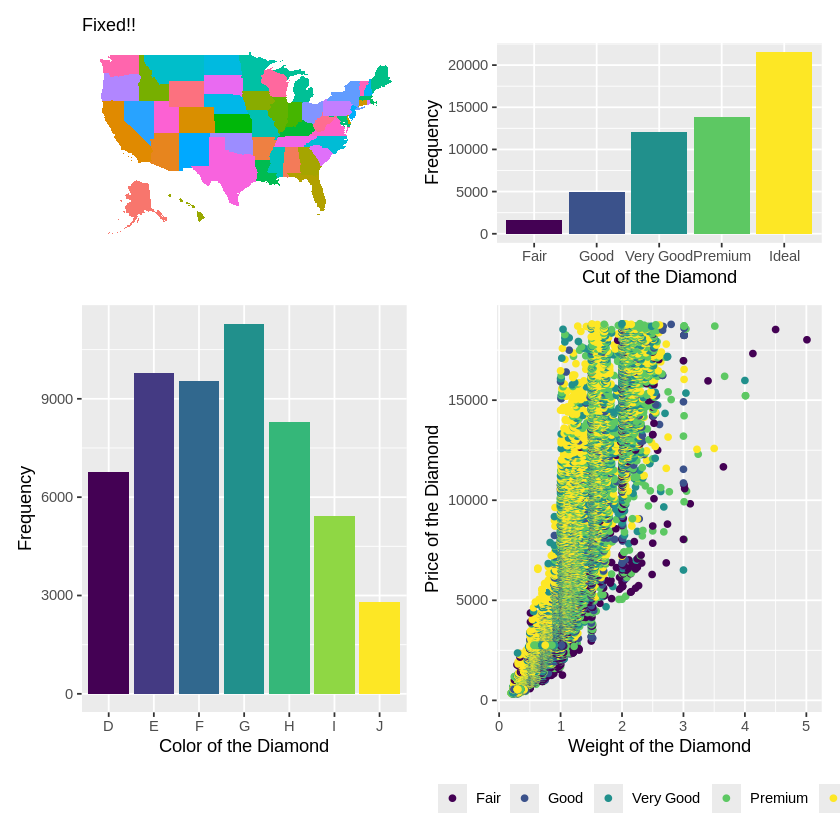

In [15]:
ggplot() +
  geom_polygon(
    data = states,
    aes(
      x = long,
      y = lat,
      group = group,
      fill = state_abbv
      )
    ) +
  coord_fixed(1.3) +
  ggthemes::theme_map() +
  theme(legend.position = "none") +
  labs(title = "Fixed!!") -> mymap

mymap + p1 + p2 + p3

# Mapping
Maps are very powerful visualizations because they allow you to highlight and reflect patterns, clusters, with relative ease. For example, is poverty really higher in Appalachian counties? What about the percent of the population without health insurance? Literacy? Opioid deaths; do they follow transportation routes? What about COVID-19 cases? Maps to the rescue!

Building a map requires a few elements. First and foremost, you need some data to show on a map. Second, you need to have the geographic coordinates needed to build a map, basically the latitude and longitude of the geographies (states, cities, school districts, etc.) that you want to map. Third, you want a column that contains the names of the geographies you want to map, and these should be properly formatted (i.e., in titlecase) for displaying on the map.

Let us start by building a simple state map with the `{urbnmapr}` package. It comes with the necessary data for states and counties, respectively, and works well with `{ggplot2}`. Note the reliance on `geom_polygon()` now.

Rows: 83,933
Columns: 9
$ long       <dbl> -88.47323, -88.46888, -88.46866, -88.45504, -88.45496, -88.…
$ lat        <dbl> 31.89386, 31.93026, 31.93317, 32.03972, 32.04058, 32.05305,…
$ order      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, …
$ hole       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL…
$ piece      <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ group      <fct> 01.1, 01.1, 01.1, 01.1, 01.1, 01.1, 01.1, 01.1, 01.1, 01.1,…
$ state_fips <chr> "01", "01", "01", "01", "01", "01", "01", "01", "01", "01",…
$ state_abbv <chr> "AL", "AL", "AL", "AL", "AL", "AL", "AL", "AL", "AL", "AL",…
$ state_name <chr> "Alabama", "Alabama", "Alabama", "Alabama", "Alabama", "Ala…
Rows: 208,874
Columns: 12
$ long        <dbl> -86.91760, -86.81657, -86.71339, -86.71422, -86.41312, -86…
$ lat         <dbl> 32.66417, 32.66012, 32.66173, 32.70569, 32.70739, 32.40994…
$ order       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,

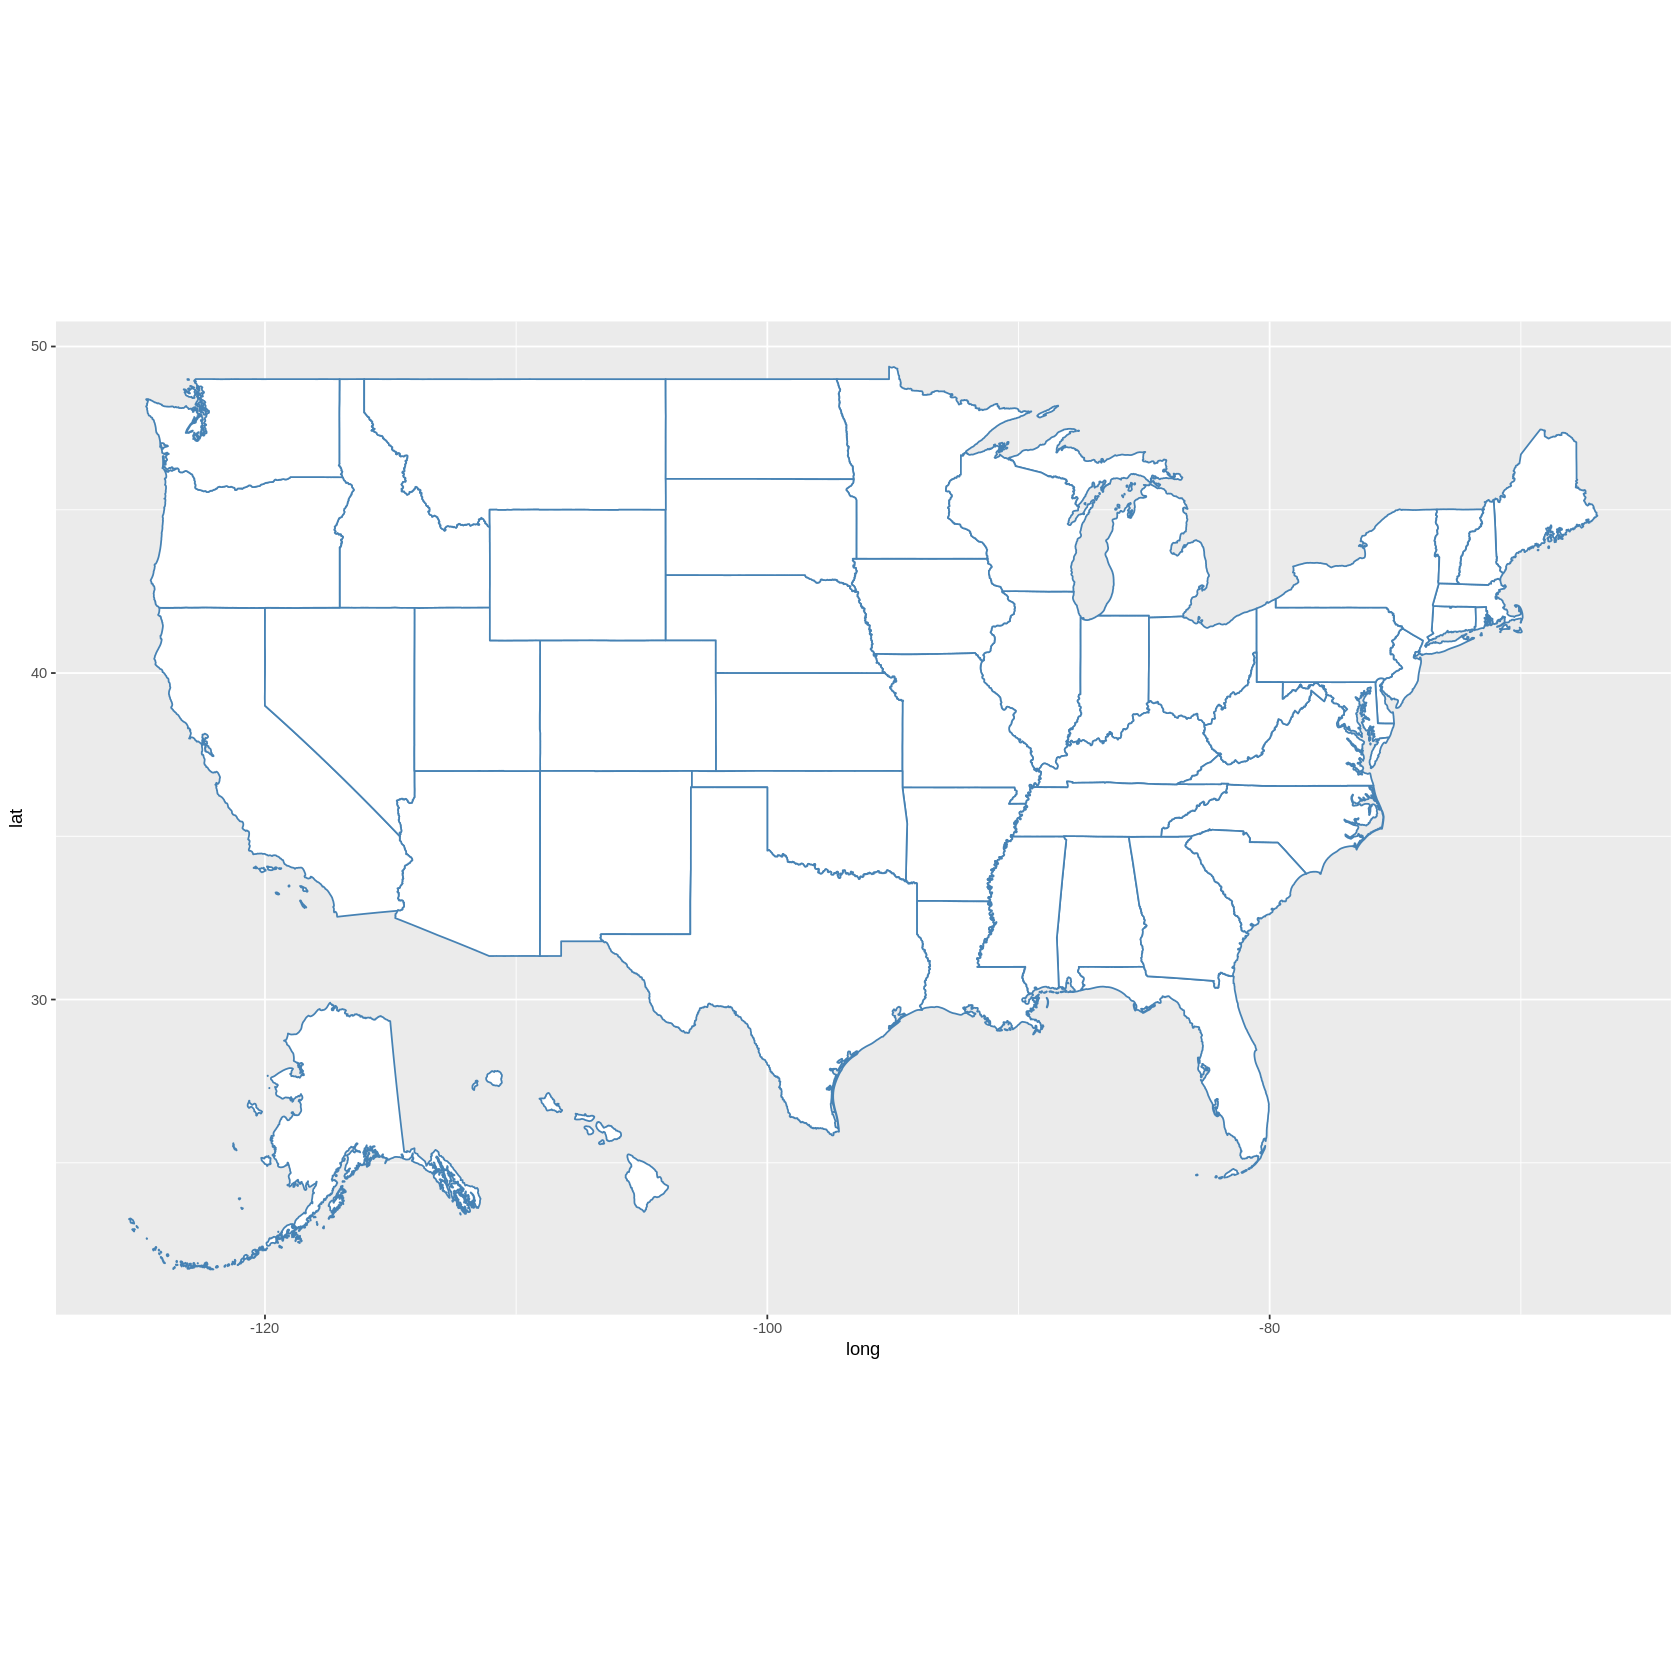

In [36]:
glimpse(states)
glimpse(counties)

ggplot() +
  geom_polygon(data = states,
               aes(x = long, y = lat, group = group),
               fill = "white", color = "steelblue") +
  coord_fixed(1.3)

Note that this is just an empty map with the shapes of the states, and also that Alaska and Hawaii have been moved so that they can be displayed on the map. We could build a much better map by removing the x and y axis labels and tick marks, and setting a white background using `theme_map()` from the `{ggthemes}` package. We could also fill with some colors, say on the basis of the `state_name`.

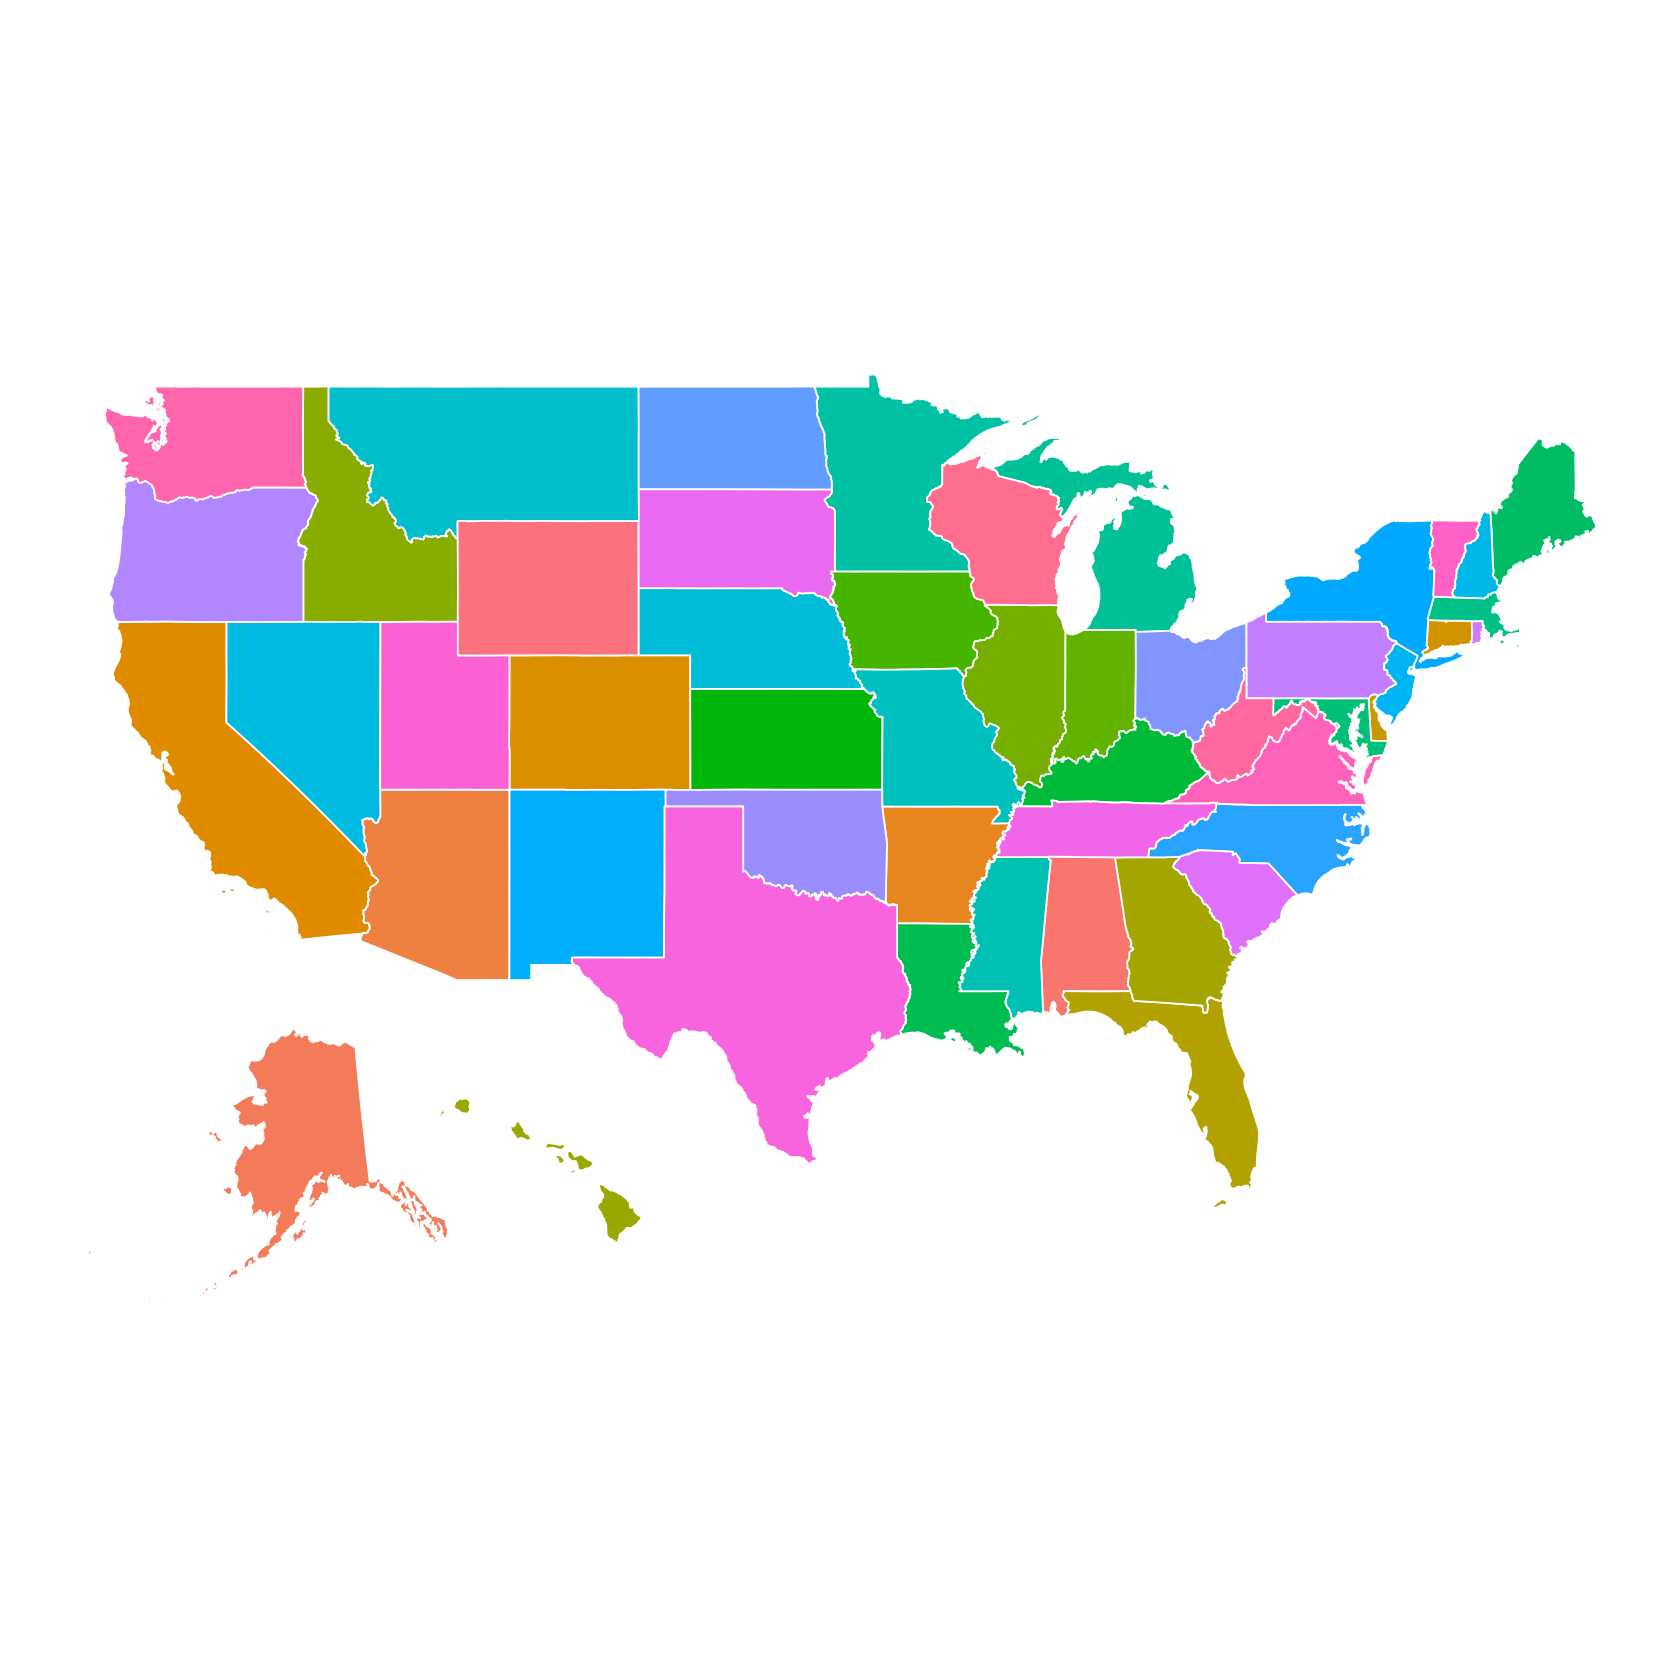

In [37]:
ggplot() +
  geom_polygon(data = states,
               aes(x = long, y = lat, group = group, fill = state_name),
               color = "white") +
  coord_fixed(1.3) +
  ggthemes::theme_map() +
  theme(legend.position = "none")

Okay, this is not very useful because it would be much better to color the map on the basis of some substantive variable. Let us see what lurks in the `statedata` file.

In [38]:
glimpse(statedata)

Rows: 51
Columns: 6
$ year        <int> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015…
$ state_fips  <chr> "01", "02", "04", "05", "06", "08", "09", "10", "11", "12"…
$ state_name  <chr> "Alabama", "Alaska", "Arizona", "Arkansas", "California", …
$ hhpop       <int> 1846380, 250183, 2463012, 1144657, 12895471, 2074517, 1343…
$ horate      <dbl> 0.6814329, 0.6311860, 0.6206178, 0.6546031, 0.5372219, 0.6…
$ medhhincome <int> 44700, 70600, 51000, 42000, 64600, 63500, 71700, 61200, 75…


Okay, two things stand out -- `horate` (the homeownership rate), and `medhhincome` (the median household income). Let us fill with median household income but to do so, we will need to join `statedata` to our `states` file. Why? Because we need coordinates to map anything and `statedata` does not contain coordinates. Then we can specify `fill = medhhincome` inside the `aes(...)` command.

In [39]:
states %>%
  left_join(statedata, by = c("state_fips", "state_name")) -> state.df
glimpse(state.df)

left_join: added 4 columns (year, hhpop, horate, medhhincome)
           > rows only in x               0
           > rows only in statedata (     0)
           > matched rows            83,933
           >                        ========
           > rows total              83,933


Rows: 83,933
Columns: 13
$ long        <dbl> -88.47323, -88.46888, -88.46866, -88.45504, -88.45496, -88…
$ lat         <dbl> 31.89386, 31.93026, 31.93317, 32.03972, 32.04058, 32.05305…
$ order       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ hole        <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FA…
$ piece       <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ group       <fct> 01.1, 01.1, 01.1, 01.1, 01.1, 01.1, 01.1, 01.1, 01.1, 01.1…
$ state_fips  <chr> "01", "01", "01", "01", "01", "01", "01", "01", "01", "01"…
$ state_abbv  <chr> "AL", "AL", "AL", "AL", "AL", "AL", "AL", "AL", "AL", "AL"…
$ state_name  <chr> "Alabama", "Alabama", "Alabama", "Alabama", "Alabama", "Al…
$ year        <int> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015…
$ hhpop       <int> 1846380, 1846380, 1846380, 1846380, 1846380, 1846380, 1846…
$ horate      <dbl> 0.6814329, 0.6814329, 0.6814329, 0.6814329, 0.6814329, 0.6…
$ medhhincome <

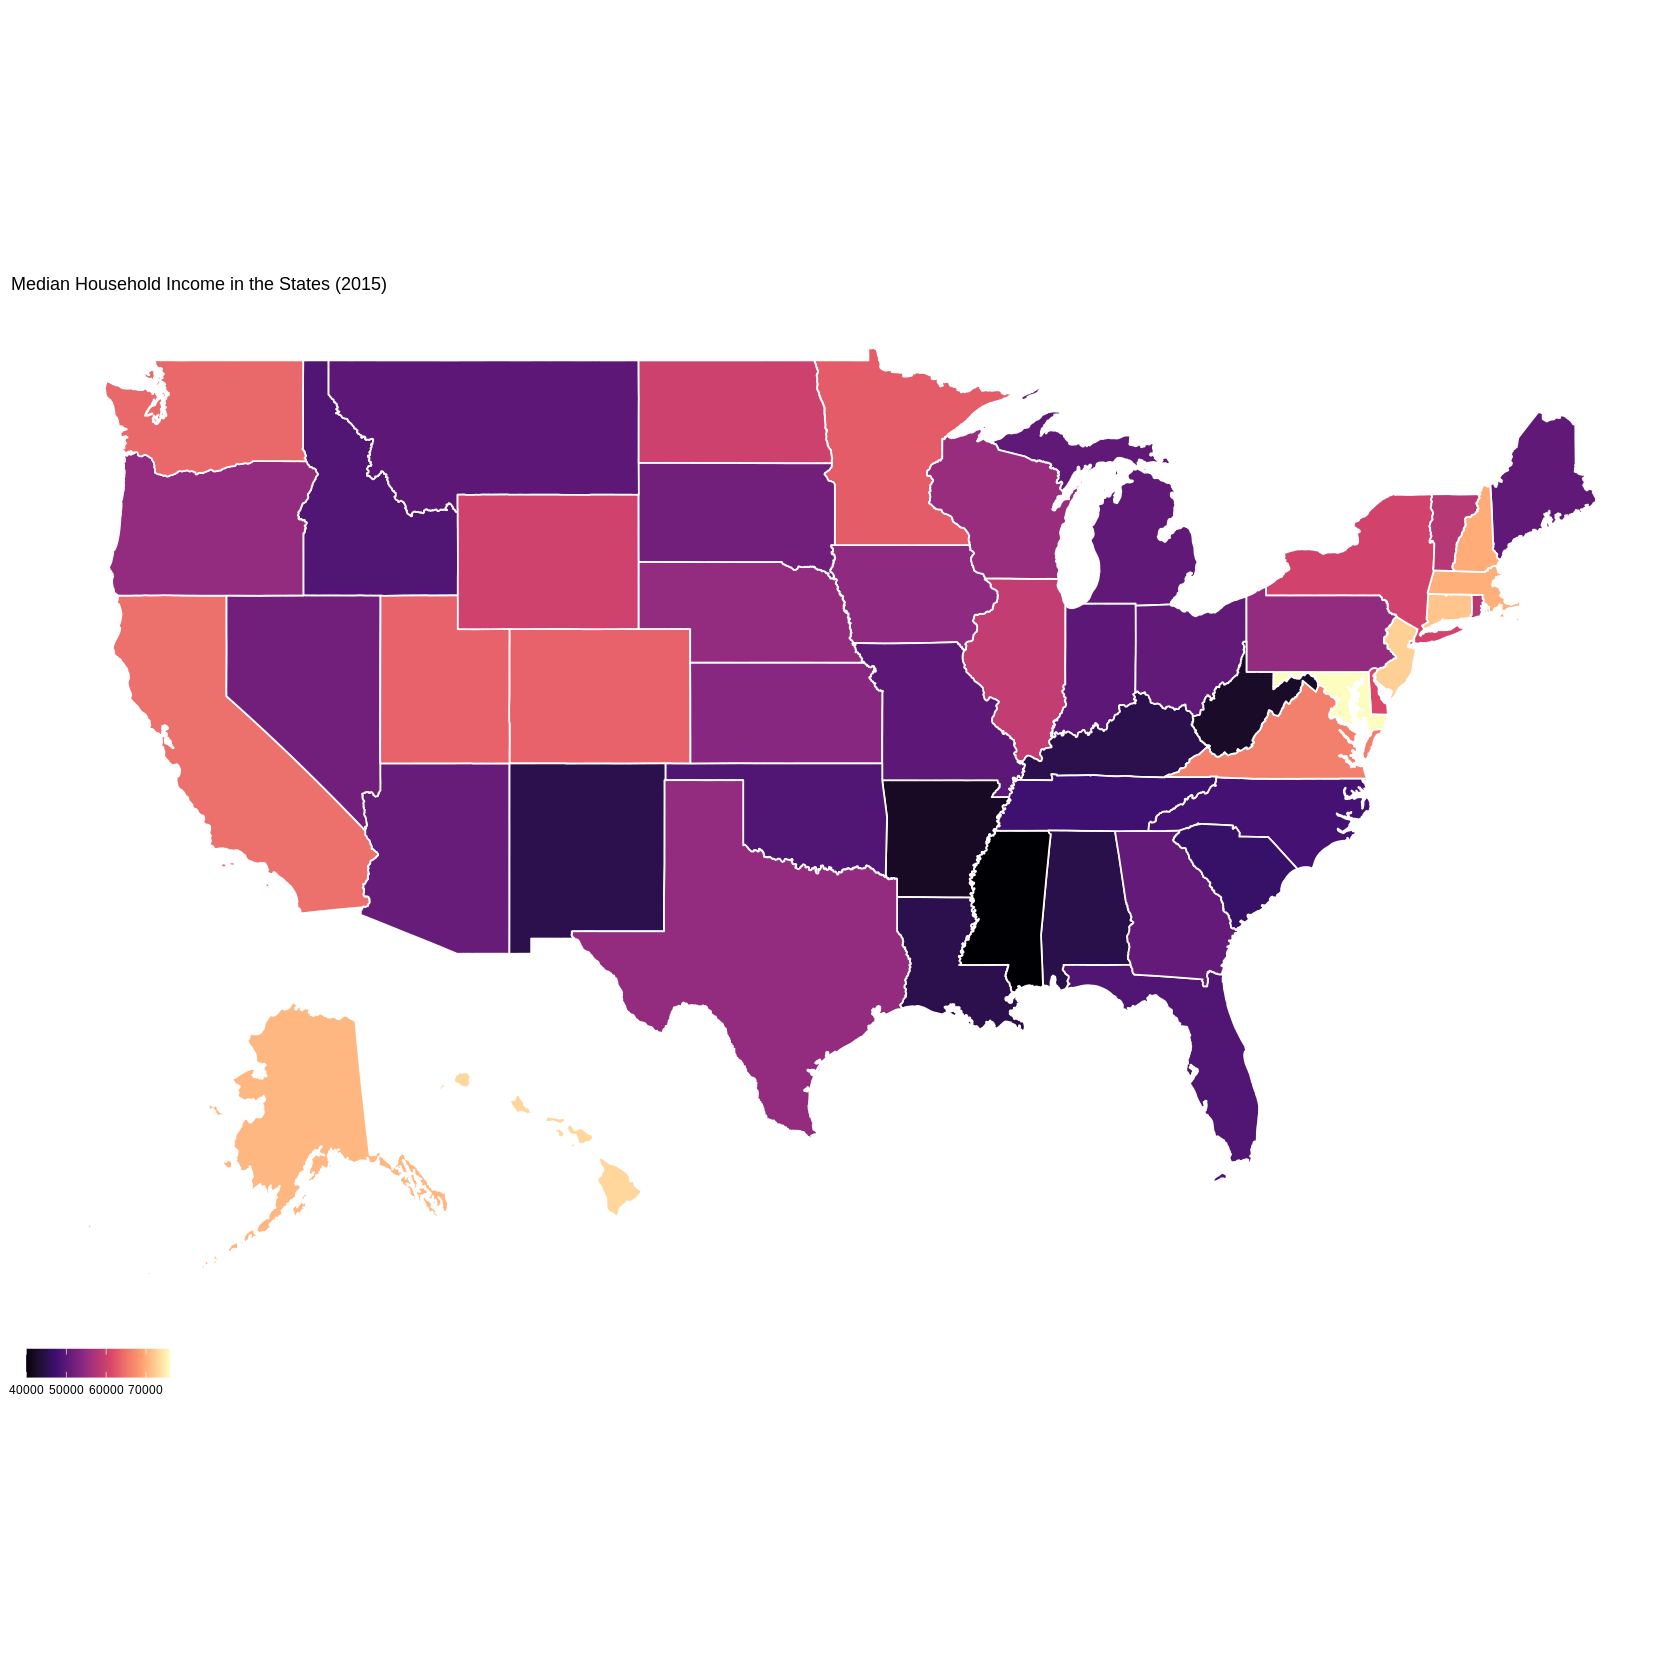

In [40]:
ggplot() +
  geom_polygon(data = state.df,
               aes(x = long, y = lat, group = group, fill = medhhincome),
               color = "white") +
  coord_fixed(1.3) +
  ggthemes::theme_map() +
  theme(legend.position = "bottom") +
  labs(
    title = "Median Household Income in the States (2015)",
    fill = ""
        ) +
  scale_fill_viridis_c(option = "magma")

What about working with counties? Sure, let us merge `countydata` with the `counties file and map.

left_join: added 4 columns (year, hhpop, horate, medhhincome)
           > rows only in x                 0
           > rows only in countydata (      0)
           > matched rows             208,874
           >                         =========
           > rows total               208,874


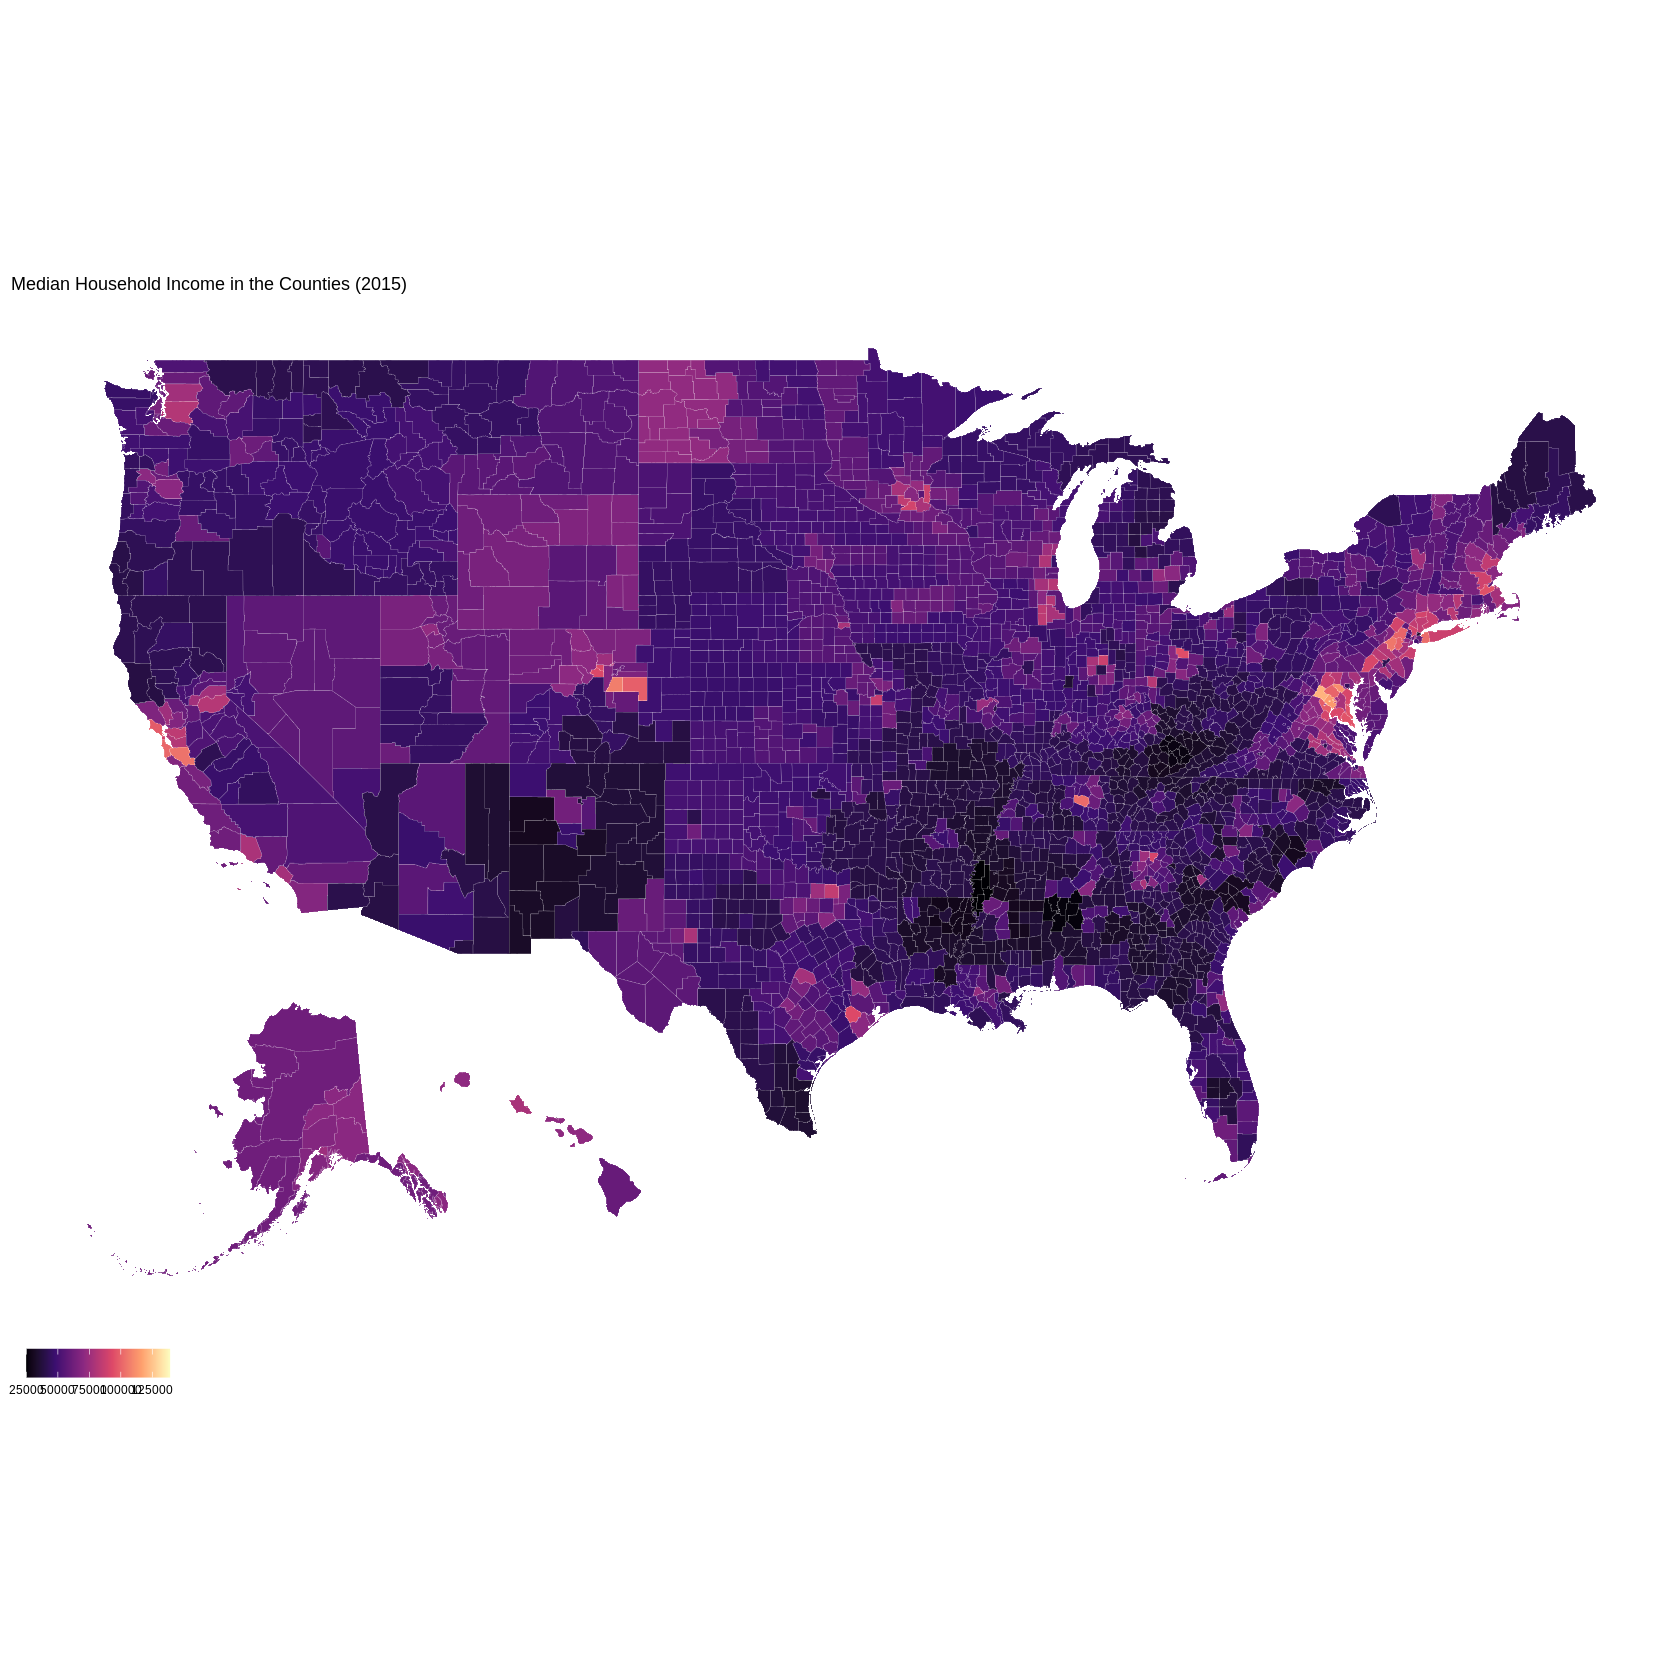

In [43]:
counties %>%
  left_join(countydata, by = c("county_fips")) -> county.df

ggplot() +
  geom_polygon(data = county.df,
               aes(x = long, y = lat, group = group, fill = medhhincome),
               color = "white", linewidth = 0.05) +
  coord_fixed(1.3) +
  ggthemes::theme_map() +
  theme(legend.position = "bottom") +
  labs(
    title = "Median Household Income in the Counties (2015)",
    fill = ""
        ) +
  scale_fill_viridis_c(option = "magma")

Maybe you are only interested in Florida?

filter: removed 203,791 rows (98%), 5,083 rows remaining


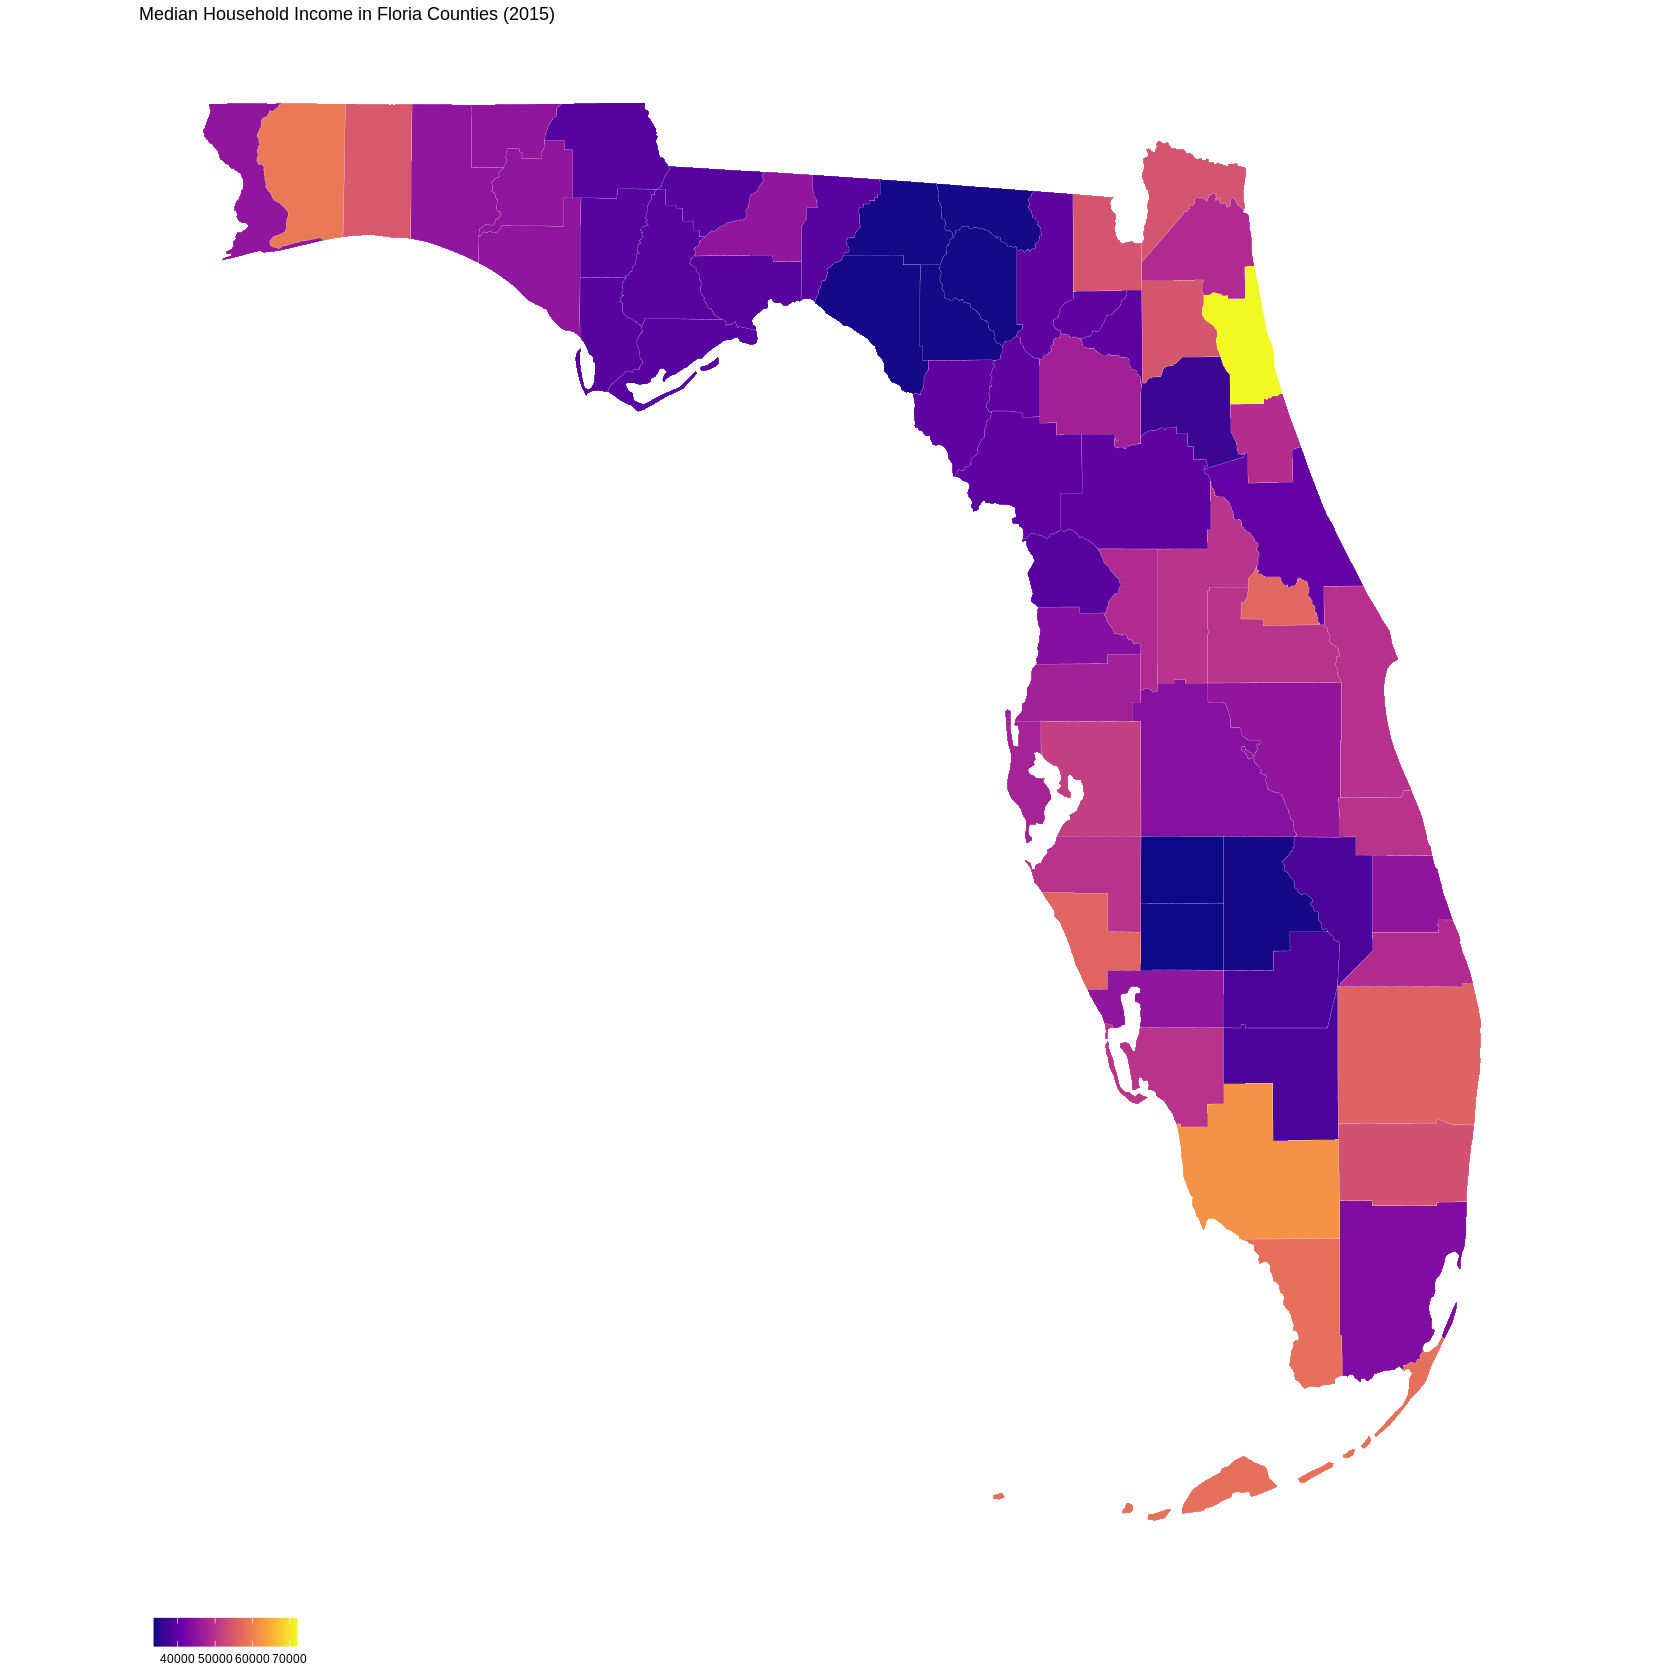

In [44]:
county.df %>%
  filter(state_abbv == "FL") %>%
  ggplot() +
  geom_polygon(
               aes(x = long, y = lat, group = group,
                   fill = medhhincome),
               color = "white", linewidth = 0.05
               ) +
  coord_fixed(1.3) +
  ggthemes::theme_map() +
  theme(legend.position = "bottom") +
  labs(
    title = "Median Household Income in Floria Counties (2015)",
    fill = ""
        ) +
  scale_fill_viridis_c(option = "plasma")

Hmm, so far so good but what if the data were for some geography not bundled with `{urbnmapr}`, school districts or places, for example? Not a problem, we just have to go the extra mile. First we would have to find, download, and upload the `shapefile`. Say I am looking for places (loosely described as municipalities) in New Hampshire. Well, the `{tigris}` package comes in handy because it allows you to get whatever geography's shapefiles you want. Below I am getting the shapefile for New Hampshire.

In [54]:
devtools::install_github("walkerke/tigris")
#devtools::install_github("walkerke/tigris@ftp-patch")


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpyZF1zw/remotes1972dbe04bd/walkerke-tigris-70ac444/DESCRIPTION’ ... OK
* preparing ‘tigris’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘tigris_2.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [55]:
library(tigris)

options(tigris_use_cache = TRUE)

In [56]:
places(
  state = "NH",
  cb = TRUE,
  year = 2020,
  progress_bar = TRUE
  ) -> places.nh

Warning message in download.file(url, destfile = file_loc, quiet = !progress_bar, :
“URL 'ftp://ftp2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_33_place_500k.zip': Timeout of 300 seconds was reached”
Previous download failed.  Re-download attempt 1 of 3...

Warning message in download.file(url, destfile = file_loc, quiet = !progress_bar, :
“URL 'ftp://ftp2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_33_place_500k.zip': Timeout of 300 seconds was reached”
Previous download failed.  Re-download attempt 2 of 3...

Warning message in download.file(url, destfile = file_loc, quiet = !progress_bar, :
“URL 'ftp://ftp2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_33_place_500k.zip': Timeout of 300 seconds was reached”
Previous download failed.  Re-download attempt 3 of 3...

Warning message in download.file(url, destfile = file_loc, quiet = !progress_bar, :
“URL 'ftp://ftp2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_33_place_500k.zip': Timeout of 300 seconds was reached”


ERROR: Error: Download failed; check your internet connection or the status of the Census Bureau website
                 at https://www2.census.gov/geo/tiger/ or ftp://ftp2.census.gov/geo/tiger/.


Okay, so now that I have the shapefile, how can I use it? I need to `fortify` it so that it looks like a regular dataframe rather than the native SpatialPolygonsDataFrame format it comes in. When I go to make the map I am going to add the state shapefile too since otherwise the state's boundary will not show up.

In [ ]:
places.nh %>%
  fortify(
  region = "GEOID"
  ) -> nh.df

ggplot() +
  geom_polygon(
    data = subset(
      state.df,
      state_name == "New Hampshire"
      ),
    aes(
      x = long,
      y = lat,
      group = group
      ),
    fill = "white",
    color = "black"
    ) +
  geom_polygon(
    data = nh.df,
    aes(
      x = long,
      y = lat,
      group = group,
      fill = id,
      color = id
      )
    ) +
  coord_fixed(1.3) +
  ggthemes::theme_map() +
  theme(legend.position = "none")

Of course, the `fill` is superficial here. But say we had some data for places in New Hampshire, maybe the size of the population, as in `nh.data.RData`. Now we could join `nh.data` with `nh.df` to create `nh` and then map.  

In [ ]:
load(here::here("data", "nh.data.RData"))

nh.df %>%
  left_join(nh.data, by = c("id" = "GEOID")) -> nh

glimpse(nh)

Now we plot:

In [ ]:
ggplot() +
  geom_polygon(
    data = subset(state.df, state_name == "New Hampshire"),
    aes(x = long, y = lat, group = group),
    fill = "white", color = "black"
    ) +
  geom_polygon(
    data = nh,
    aes(x = long, y = lat, group = group, fill = population)
    ) +
  coord_fixed(1.3) +
  scale_fill_viridis_c(option = "viridis") +
  ggthemes::theme_map() +
  theme(legend.position = "bottom") +
  labs(
    fill = "",
    title = "Population Distribution in New Hampshire's Places",
    subtitle = "(American Community Survey, 2014-2018)"
       )

You could have also filled by creating quartiles, etc., using `{Santoku}`, so do not forget that option.

Before we move on, one more map, to show you the possibilities. Here, I am
plotting the locations of the parking tickets issued in Philadelphia, this time with the `{leaflet}` package. First the tickets data-set, reduced to a random sample of 20% of the tickets issued in the month of December in 2017 (to keep the data size manageable). I have also created a `popup` that will display specific information if someone clicks on a point in the map.   

In [ ]:
readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-12-03/tickets.csv") %>%
  mutate(
    year = lubridate::year(issue_datetime),
    month = lubridate::month(issue_datetime)
         ) %>%
  filter(month == 12, lon > -75.5) %>%
  sample_frac(0.2) -> tickets

tickets %>%
  unite(display, c(issuing_agency, issue_datetime, fine),
       sep = "; ", remove = FALSE) -> tickets

library(leaflet)
library(htmltools)
library(widgetframe)

leaflet(tickets) %>%
  addTiles() %>%
  addCircles(lng = ~ lon, lat = ~ lat, popup = ~htmlEscape(display),
             color = "steelblue", opacity = 0.10) -> lst

frameWidget(lst, width = "100%", height = "400")

Voila! A few lines of code and we have an interactive map that can be used to display whatever evidence we want to display. Note that you need geographic coordinates since without them the data cannot be attached to a physical location.  

Let us see another twist on this. Say I am trying to map the total number of COVID-19 cases in Ohio. I know the county and I know the number of cases that occurred, as well as the latitude and longitude of each county. Well, I can build a similar plot except making the size of the circle conditional upon the number of cases. The more the cases, the larger the radius of the circle.

In [ ]:
readr::read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv") -> covid

covid %>%
  filter(state == "Ohio", date == "2020-04-17") -> cov19

But there are no coordinates in `cov19`. Well, I can get those from the `{housingData}` package, and then merge that with `cov19`.

In [ ]:
library(housingData)
geoCounty %>%
  filter(state == "OH") %>%
  separate(county,
           into = c("countyname", "extra"),
           sep = " County",
           remove = TRUE) %>%
  mutate(countyname = stringr::str_to_sentence(countyname)) -> oh

oh %>%
  left_join(cov19, by = c("countyname" = "county")) -> ohcov19

ohcov19 %>%
  unite(display, c(countyname, cases),
        sep = ": ",
        remove = FALSE) -> ohcov19

glimpse(ohcov19)

Okay, now we have everything we need to build the map.

In [ ]:
leaflet(ohcov19) %>%
  addTiles() %>%
  addCircleMarkers(
    lng = ~ lon, lat = ~ lat, popup = ~htmlEscape(display),
    color = "salmon", opacity = 0.10, radius = ~sqrt(cases)
    ) -> lst

frameWidget(lst, width = "100%", height = "600")

# Interactive Graphics with Plotly and Highcharter
Interactive graphics are useful in situations where you would like the user/viewer to see the data values or other details. Say, for example, I have a plots and want to make it interactive. How can I do that? By saving my regular plot and then using `{plotly}` to add a `ggplotly()` wrapper around the plot.

In [ ]:
library(plotly)

ggplot() +
  geom_point(
    data = mpg,
    mapping = aes(x = cty, y = hwy, color = trans)
    ) +
  labs(x = "City Mileage",
       y = "Highway Mileage",
       color = "Transmission") -> pl01

lst <- list()
ggplotly(pl01) -> lst

htmltools::tagList(lst)

These plots are useful when presenting data to a live audience (in a talk, or on the web). But, I prefer `{highcharter}` since it does a lot of things well, and they are aesthetically pleasing. Let us stay with the COVID-19 example. Say I want a bar-chart of the total number of cases by state.

In [ ]:
library(highcharter)

covid %>%
  filter(date == "2020-04-17") %>%
  rename(State = state, `Total Cases` = cases) -> tab1

lst <- list()

hchart(tab1, "bar", hcaes(x = State, y = `Total Cases`)) -> lst

htmltools::tagList(lst)

Notice the key elements here: The basic function call is `hchart()` and we are specifying that we want a bar-chart, and we are also providing the quantities that should go on the x and y axis, respectively. Note that x actually ends up as the y when you specify a "bar" chart.

What if I wanted a line-chart, maybe of the number of cases over time? And I wanted this just for a few states? We could do that too, as shown below. Note that I am creating `tab2`, a frequency table of the number of cases by state and date, and then converting total_cases into a logarithmic form (saved as `log_cases`) so that we can compare the rate of change from one date to the next on a common scale.  

In [ ]:
covid %>%
  filter(state %in% c("Ohio", "Florida", "California", "New Jersey", "Ohio", "New York"),
         date >= "2020-03-15") %>%
  group_by(state, date) %>%
  mutate(log_cases = log(cases)) -> tab2

lst <- list()

hchart(tab2, "line", hcaes(x = date, y = log_cases, group = state)) -> lst

htmltools::tagList(lst)

Now here is a county-level chart that shows the total number of cases as of April 14, 2020. This is stored in `tab3` created as shown below. Pay attention to this creation because we are not just creating a frequency table but also adding in a specific key we are calling `code` because we will need to join these data to the map data.

In [ ]:
covid %>%
  group_by(county, state, fips) %>%
  filter(date == "2020-04-17") %>%
  unite(Location, c(county, state), sep = ", ", remove = TRUE) -> tab3

library(urbnmapr)
data(counties)
counties %>%
  separate(county_fips, into = c("stfips", "fips"),
           sep = 2, remove = FALSE) %>%
  mutate(leader = "us",
         stlower = stringr::str_to_lower(state_abbv)) %>%
  unite(code, c(leader, stlower, fips), sep = "-") -> cdf

cdf %>%
  select(code, county_fips) %>%
  distinct() -> cdf2

tab3 %>%
  left_join(cdf2, by = c("fips" = "county_fips")) -> tab4

Here comes the map!

In [ ]:
library(viridis)

lst <- list()

hcmap("countries/us/us-all-all",
      data = tab4,
      name = "COVID-19 Cases", value = "cases",
      joinBy = c("hc-key", "code"),
      borderColor = "steelblue") %>%
  hc_colorAxis(stops = color_stops(10, rev(magma(10)))) %>%
  hc_legend(layout = "horizontal", align = "right",
            floating = TRUE, valueDecimals = 0, valueSuffix = "") -> lst

htmltools::tagList(lst)

Note that `countries/us/us-all-all` indicates that we want counties. If we wanted the states instead it would have been `countries/us/us-all`. The `value = ` flags the column that has to be used to populate the color scheme. The `joinBy` connects our data (`tab4`) to `hcmap()` so that `total_cases` gets attached to the correct location in the map.

What if we wanted only Ohio? Well, in that case we could subset as shown below:

In [ ]:
tab4 %>%
  filter(grepl("-oh-", code)) -> tab5

lst <- list()

hcmap("countries/us/us-oh-all",
      data = tab5,
      name = "COVID-19 Cases", value = "cases",
      joinBy = c("hc-key", "code"),
      borderColor = "steelblue") %>%
  hc_colorAxis(stops = color_stops(10, rev(magma(10)))) %>%
  hc_legend(layout = "horizontal", align = "right",
            floating = TRUE, valueDecimals = 0, valueSuffix = "") -> lst

htmltools::tagList(lst)

# Practice Exercises
## Exercise (1) {-}
Create a map of all the counties in New York. Be sure to title the map and to fill in each county with the total number of COVID19 cases they have seen to date. In addition, draw county borders in white. Use `theme_map()` and make sure the legend is at the bottom. [**Hint:** You will need to calculate the total number of cases per county and then join the resulting file with the counties data file to get the latitude/longitudes for the counties.]

## Exercise (2) {-}
Run the following code chunk to load data on the murder, assault and rape rates per 100,000 persons. `Urbanpop` is the percent of the state population that lives in an urban area.

In [ ]:
data(USArrests)
names(USArrests)
USArrests$statename <-  rownames(USArrests)

Now create a state-level map of the 50 states making sure to use `UrbanPop` to fill each state. Title the map and place the legend at the bottom.

## Exercise (3) {-}
Use the `USArrests` data to draw scatterplots of (a) `Murder` versus `UrbanPop`, (b) `Assault` versus `UrbanPop`, and (c) `Rape  versus UrbanPop`. Save each of these scatterplots by name and then use `patchwork` to create a single canvas that includes all three plots. Make sure you label the x-axis, y-axis, and title each plot.

## Exercise (4) {-}
Now create `highcharter` versions of each of the three scatterplots you created in Exercise (3) above. You should end up with three scatterplots, each on its own canvas.

## Exercise (5) {-}
The `sftrees` dataset includes various pieces of data on trees in San Francisco. In turn, `sf.df` is a 10% random sample of these trees.

Use `leaflet` to create a map that shows, as circles, the location of each tree, and make sure when someone clicks on the circle the popup shows the `species`. Also ensure that the circles are green in color.

In [ ]:
readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-28/sf_trees.csv') -> sf_trees

sf_trees %>%
  sample_frac(0.10) -> sf.df